In [1]:
# 1. Verificar ruta de los archivos
import os

print("📁 Estructura de carpetas:")
for root, dirs, files in os.walk('/content/drive/MyDrive/dbs portfolio/Churn Model'):
    level = root.replace('/content/drive/MyDrive/dbs portfolio/Churn Model', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files:
        print(f'{subindent}{file}')

📁 Estructura de carpetas:
Churn Model/
  seguros_activos.csv
  seguros_historico.csv
  outputs/
    01_distribucion_churn.png
    02_churn_por_categorias.png
    03_comparacion_numericas_churn.png
    05_matriz_correlacion.png
    06_top_features_churn.png
    07_comparacion_modelos.png
    08_curvas_roc.png
    09_matriz_confusion_mejor_modelo.png
    10_feature_importance.png
    11_threshold_optimization.png
    comparacion_modelos.csv
    feature_importance.csv
    12_analisis_predicciones.png
    resumen_ejecutivo.txt
    clientes_criticos_urgentes.csv
    clientes_accion_inmediata.csv
    predicciones_completas.csv
  models/
    label_encoders.pkl
    scaler.pkl
    features.pkl
    modelo_churn_final.pkl
    threshold_config.pkl
    resultados_modelos.pkl
  data/
    X_train.csv
    X_test.csv
    y_train.csv
    y_test.csv
    dataset_preprocesado.csv


In [2]:
import pandas as pd
import numpy as np

# Definir rutas de los archivos
ruta_base = '/content/drive/MyDrive/dbs portfolio/Churn Model/'
ruta_historico = ruta_base + 'seguros_historico.csv'
ruta_activos = ruta_base + 'seguros_activos.csv'

print("🔄 Cargando datasets...")

# Cargar datos históricos
df_historico = pd.read_csv(ruta_historico)
print(f"\n✅ DATASET HISTÓRICO cargado")
print(f"   Filas: {len(df_historico):,}")
print(f"   Columnas: {len(df_historico.columns)}")

# Cargar datos activos
df_activos = pd.read_csv(ruta_activos)
print(f"\n✅ DATASET ACTIVOS cargado")
print(f"   Filas: {len(df_activos):,}")
print(f"   Columnas: {len(df_activos.columns)}")

# Verificar columnas
print(f"\n📋 COLUMNAS DEL HISTÓRICO:")
print(list(df_historico.columns))

print(f"\n📋 COLUMNAS DE ACTIVOS:")
print(list(df_activos.columns))

# Verificar churn
if 'churn' in df_historico.columns:
    print(f"\n🎯 DISTRIBUCIÓN DE CHURN (Histórico):")
    churn_counts = df_historico['churn'].value_counts()
    churn_pct = df_historico['churn'].value_counts(normalize=True) * 100
    print(f"   Activos (0): {churn_counts.get(0, 0):,} ({churn_pct.get(0, 0):.1f}%)")
    print(f"   Churn (1):   {churn_counts.get(1, 0):,} ({churn_pct.get(1, 0):.1f}%)")
else:
    print(f"\n⚠️ ADVERTENCIA: No se encontró columna 'churn' en histórico")

if 'churn' in df_activos.columns:
    print(f"\n⚠️ ADVERTENCIA: La columna 'churn' NO debería estar en activos")
else:
    print(f"\n✅ Dataset activos correcto (sin columna churn)")

print(f"\n🎉 ¡Datasets listos para análisis!")

🔄 Cargando datasets...

✅ DATASET HISTÓRICO cargado
   Filas: 1,500
   Columnas: 35

✅ DATASET ACTIVOS cargado
   Filas: 400
   Columnas: 33

📋 COLUMNAS DEL HISTÓRICO:
['cliente_id', 'nombre_comercial', 'tipo_cliente', 'sector_industria', 'pais_origen', 'region', 'ciudad', 'antiguedad_meses', 'fecha_primera_poliza', 'tiene_contrato_anual', 'canal_adquisicion', 'ejecutivo_asignado', 'numero_polizas_activas', 'prima_mensual_promedio', 'prima_total_12meses', 'num_envios_ultimo_mes', 'num_envios_trimestre', 'valor_mercancia_promedio', 'frecuencia_envios', 'variacion_facturacion_pct', 'dias_sin_actividad', 'num_siniestros_12meses', 'monto_siniestros_12meses', 'loss_ratio', 'num_quejas_reclamos', 'tiempo_respuesta_promedio_dias', 'satisfaccion_servicio', 'dias_mora_promedio', 'pagos_atrasados_12meses', 'metodo_pago', 'descuento_aplicado_pct', 'llamadas_comercial_trimestre', 'emails_abiertos_trimestre', 'uso_portal_digital', 'churn']

📋 COLUMNAS DE ACTIVOS:
['cliente_id', 'tipo_cliente', 'sec

In [3]:
# Crear carpetas en Google Drive
import os

ruta_proyecto = '/content/drive/MyDrive/dbs portfolio/Churn Model/'

carpetas = ['outputs', 'models', 'data']

for carpeta in carpetas:
    ruta_completa = os.path.join(ruta_proyecto, carpeta)
    if not os.path.exists(ruta_completa):
        os.makedirs(ruta_completa)
        print(f"✅ Carpeta '{carpeta}' creada")
    else:
        print(f"ℹ️ Carpeta '{carpeta}' ya existe")

print(f"\n📁 Estructura de proyecto lista!")

ℹ️ Carpeta 'outputs' ya existe
ℹ️ Carpeta 'models' ya existe
ℹ️ Carpeta 'data' ya existe

📁 Estructura de proyecto lista!


In [4]:
print("=" * 80)
print("📊 VISTA PREVIA - DATASET HISTÓRICO")
print("=" * 80)

# Primeras 5 filas
print("\n🔹 Primeras 5 filas:")
print(df_historico.head())

# Información general
print("\n🔹 Información del dataset:")
print(df_historico.info())

# Estadísticas básicas
print("\n🔹 Estadísticas descriptivas:")
print(df_historico.describe())

📊 VISTA PREVIA - DATASET HISTÓRICO

🔹 Primeras 5 filas:
      cliente_id               nombre_comercial     tipo_cliente  \
0  CLI_HIST_0001          Express Hermanos S.A.  Empresa Mediana   
1  CLI_HIST_0002  Transportes Suministros Group       Individual   
2  CLI_HIST_0003        Cargo Soluciones S.A.S.   Empresa Grande   
3  CLI_HIST_0004         Logística Blake S.A.S.  Empresa Mediana   
4  CLI_HIST_0005     Express Ramirez-Lewis S.A.  Empresa Pequeña   

  sector_industria pais_origen     region     ciudad  antiguedad_meses  \
0             Otro    Colombia  Orinoquia   Medellin                28   
1      Manufactura       Japon  Orinoquia       Otra                 5   
2           Textil      Mexico     Andina       Cali                24   
3       Tecnologia    Alemania     Caribe     Bogota                41   
4     Farmaceutico    Alemania     Andina  Cartagena                12   

  fecha_primera_poliza  tiene_contrato_anual  ...  \
0           2022-01-31               

In [5]:
# ============================================================================
# CONFIGURACIÓN Y LIBRERÍAS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuraciones
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Estilo de gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Rutas
ruta_base = '/content/drive/MyDrive/dbs portfolio/Churn Model/'
ruta_outputs = ruta_base + 'outputs/'

# Cargar datos
df = pd.read_csv(ruta_base + 'seguros_historico.csv')

print("✅ Configuración completa")
print(f"📊 Dataset cargado: {len(df):,} registros, {len(df.columns)} columnas")

✅ Configuración completa
📊 Dataset cargado: 1,500 registros, 35 columnas


In [6]:
# ============================================================================
# INFORMACIÓN BÁSICA DEL DATASET
# ============================================================================

print("=" * 80)
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

print(f"\n🔹 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"🔹 Período: {df['fecha_primera_poliza'].min()} a {df['fecha_primera_poliza'].max()}")
print(f"🔹 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 PRIMERAS 5 FILAS:")
df.head()

📋 INFORMACIÓN GENERAL DEL DATASET

🔹 Dimensiones: 1,500 filas x 35 columnas
🔹 Período: 2015-06-02 a 2024-05-02
🔹 Memoria utilizada: 1.35 MB

📊 PRIMERAS 5 FILAS:


,cliente_id,nombre_comercial,tipo_cliente,sector_industria,pais_origen,region,ciudad,antiguedad_meses,fecha_primera_poliza,tiene_contrato_anual,canal_adquisicion,ejecutivo_asignado,numero_polizas_activas,prima_mensual_promedio,prima_total_12meses,num_envios_ultimo_mes,num_envios_trimestre,valor_mercancia_promedio,frecuencia_envios,variacion_facturacion_pct,dias_sin_actividad,num_siniestros_12meses,monto_siniestros_12meses,loss_ratio,num_quejas_reclamos,tiempo_respuesta_promedio_dias,satisfaccion_servicio,dias_mora_promedio,pagos_atrasados_12meses,metodo_pago,descuento_aplicado_pct,llamadas_comercial_trimestre,emails_abiertos_trimestre,uso_portal_digital,churn
0,CLI_HIST_0001,Express Hermanos S.A.,Empresa Mediana,Otro,Colombia,Orinoquia,Medellin,28,2022-01-31,True,Comercial Directo,Ejecutivo_B,3,2676317.25,34566556.33,11,28,12413874.04,Alta,20.6,42,1,2807803.21,8.12,2,3.9,4,3,2,Transferencia,3.5,5,11,Bajo,0
1,CLI_HIST_0002,Transportes Suministros Group,Individual,Manufactura,Japon,Orinoquia,Otra,5,2024-01-01,True,Digital,Ejecutivo_C,0,460017.90,5590129.87,2,5,5000000.00,Baja,104.7,2,2,15029571.75,268.86,0,9.6,4,2,2,Cheque,6.8,8,11,Bajo,0
2,CLI_HIST_0003,Cargo Soluciones S.A.S.,Empresa Grande,Textil,Mexico,Andina,Cali,24,2022-06-02,False,Broker,Ejecutivo_D,0,6373015.86,79676252.40,24,61,56629252.02,Muy Alta,22.5,22,2,6061065.17,7.61,2,5.3,2,6,0,Transferencia,9.5,5,7,Nunca,1
3,CLI_HIST_0004,Logística Blake S.A.S.,Empresa Mediana,Tecnologia,Alemania,Caribe,Bogota,41,2020-12-31,True,Eventos,Ejecutivo_C,3,2241836.18,22506690.42,21,60,12860587.27,Muy Alta,-22.4,3,2,8132217.31,36.13,1,8.4,4,2,2,Transferencia,5.3,7,10,Bajo,0
4,CLI_HIST_0005,Express Ramirez-Lewis S.A.,Empresa Pequeña,Farmaceutico,Alemania,Andina,Cartagena,12,2023-06-02,True,Referido,Ejecutivo_E,4,1108486.26,12263610.11,12,41,12274573.29,Alta,-48.4,10,4,9226871.50,75.24,0,6.9,4,1,1,Debito Auto,6.2,1,7,Nunca,0


In [7]:
# ============================================================================
# ANÁLISIS DE CALIDAD DE DATOS
# ============================================================================

print("=" * 80)
print("🔍 CALIDAD DE DATOS")
print("=" * 80)

# Tipos de datos
print("\n📝 TIPOS DE DATOS:")
print(df.dtypes.value_counts())

# Valores nulos
print("\n🔍 VALORES NULOS:")
nulos = df.isnull().sum()
if nulos.sum() > 0:
    nulos_pct = (nulos / len(df)) * 100
    df_nulos = pd.DataFrame({
        'Columna': nulos.index,
        'Valores_Nulos': nulos.values,
        'Porcentaje': nulos_pct.values
    })
    df_nulos = df_nulos[df_nulos['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)
    print(df_nulos)
else:
    print("✅ No hay valores nulos - Dataset limpio!")

# Duplicados
duplicados = df.duplicated().sum()
print(f"\n🔄 DUPLICADOS: {duplicados} registros")
if duplicados > 0:
    print("⚠️ Se recomienda revisar y eliminar duplicados")

🔍 CALIDAD DE DATOS

📝 TIPOS DE DATOS:
object     13
int64      13
float64     8
bool        1
Name: count, dtype: int64

🔍 VALORES NULOS:
✅ No hay valores nulos - Dataset limpio!

🔄 DUPLICADOS: 0 registros


🎯 ANÁLISIS DE CHURN (Variable Objetivo)

📊 DISTRIBUCIÓN:
  Activos (0): 1,125 clientes (75.0%)
  Churn (1):   375 clientes (25.0%)

✅ Dataset BALANCEADO - Perfecto para modelado


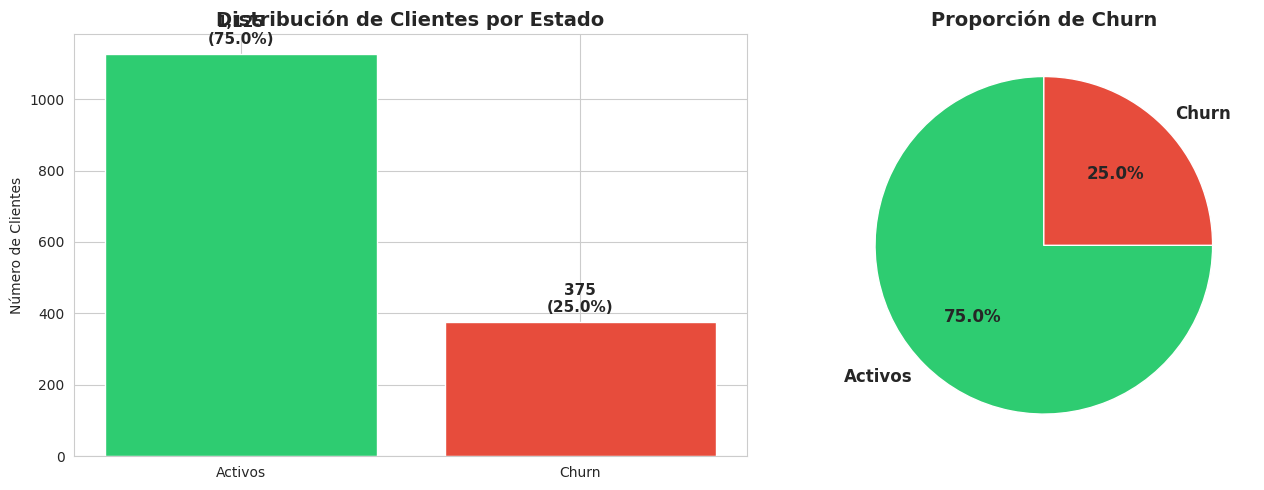


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/01_distribucion_churn.png


In [8]:
# ============================================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO: CHURN
# ============================================================================

print("=" * 80)
print("🎯 ANÁLISIS DE CHURN (Variable Objetivo)")
print("=" * 80)

# Distribución
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

print(f"\n📊 DISTRIBUCIÓN:")
print(f"  Activos (0): {churn_counts[0]:,} clientes ({churn_pct[0]:.1f}%)")
print(f"  Churn (1):   {churn_counts[1]:,} clientes ({churn_pct[1]:.1f}%)")

if churn_pct[1] >= 15 and churn_pct[1] <= 35:
    print(f"\n✅ Dataset BALANCEADO - Perfecto para modelado")
else:
    print(f"\n⚠️ Dataset DESBALANCEADO - Considerar técnicas de balanceo")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(['Activos', 'Churn'], churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Clientes por Estado', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Número de Clientes')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 20, f'{v:,}\n({churn_pct.values[i]:.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=['Activos', 'Churn'], autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(ruta_outputs + '01_distribucion_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}01_distribucion_churn.png")

In [9]:
# ============================================================================
# ANÁLISIS DE VARIABLES CATEGÓRICAS VS CHURN
# ============================================================================

print("=" * 80)
print("📊 VARIABLES CATEGÓRICAS - IMPACTO EN CHURN")
print("=" * 80)

# Variables categóricas clave
cat_vars = ['tipo_cliente', 'sector_industria', 'canal_adquisicion',
            'frecuencia_envios', 'uso_portal_digital']

# Tasa de churn promedio
tasa_churn_promedio = churn_pct[1]

for var in cat_vars:
    print(f"\n{'=' * 60}")
    print(f"🔹 {var.upper().replace('_', ' ')}")
    print(f"{'=' * 60}")

    # Tabla cruzada
    ct = pd.crosstab(df[var], df['churn'], margins=True)
    ct_pct = pd.crosstab(df[var], df['churn'], normalize='index') * 100

    # Combinar
    resultado = pd.DataFrame({
        'Total_Clientes': ct['All'],
        'Activos': ct[0],
        'Churn': ct[1],
        'Tasa_Churn_%': ct_pct[1]
    })
    resultado = resultado[:-1].sort_values('Tasa_Churn_%', ascending=False)

    print(resultado)

    # Identificar categorías de alto riesgo
    alto_riesgo = resultado[resultado['Tasa_Churn_%'] > tasa_churn_promedio]
    if len(alto_riesgo) > 0:
        print(f"\n⚠️ CATEGORÍAS DE ALTO RIESGO (>{tasa_churn_promedio:.1f}% churn):")
        for idx in alto_riesgo.index:
            print(f"   • {idx}: {alto_riesgo.loc[idx, 'Tasa_Churn_%']:.1f}%")

# ============================================================================
# ANÁLISIS ESPECIAL: TIENE_CONTRATO_ANUAL (Variable booleana)
# ============================================================================

print(f"\n{'=' * 60}")
print(f"🔹 TIENE CONTRATO ANUAL (Análisis especial)")
print(f"{'=' * 60}")

# Convertir a string para análisis consistente
df['tiene_contrato_anual_str'] = df['tiene_contrato_anual'].astype(str)

ct = pd.crosstab(df['tiene_contrato_anual_str'], df['churn'], margins=True)
ct_pct = pd.crosstab(df['tiene_contrato_anual_str'], df['churn'], normalize='index') * 100

resultado_contrato = pd.DataFrame({
    'Total_Clientes': ct['All'],
    'Activos': ct[0],
    'Churn': ct[1],
    'Tasa_Churn_%': ct_pct[1]
})
resultado_contrato = resultado_contrato[:-1].sort_values('Tasa_Churn_%', ascending=False)

print(resultado_contrato)

# Eliminar columna temporal
df.drop('tiene_contrato_anual_str', axis=1, inplace=True)

print("\n✅ Análisis de variables categóricas completado")

📊 VARIABLES CATEGÓRICAS - IMPACTO EN CHURN

🔹 TIPO CLIENTE
                 Total_Clientes  Activos  Churn  Tasa_Churn_%
tipo_cliente                                                 
Empresa Grande              296      210     86     29.054054
Empresa Pequeña             466      354    112     24.034335
Empresa Mediana             585      453    132     22.564103
All                        1500     1125    375           NaN

⚠️ CATEGORÍAS DE ALTO RIESGO (>25.0% churn):
   • Empresa Grande: 29.1%

🔹 SECTOR INDUSTRIA
                  Total_Clientes  Activos  Churn  Tasa_Churn_%
sector_industria                                              
Alimentos                    172      123     49     28.488372
Tecnologia                   217      160     57     26.267281
Otro                         187      138     49     26.203209
Manufactura                  182      135     47     25.824176
Quimico                      178      136     42     23.595506
Retail                       177   

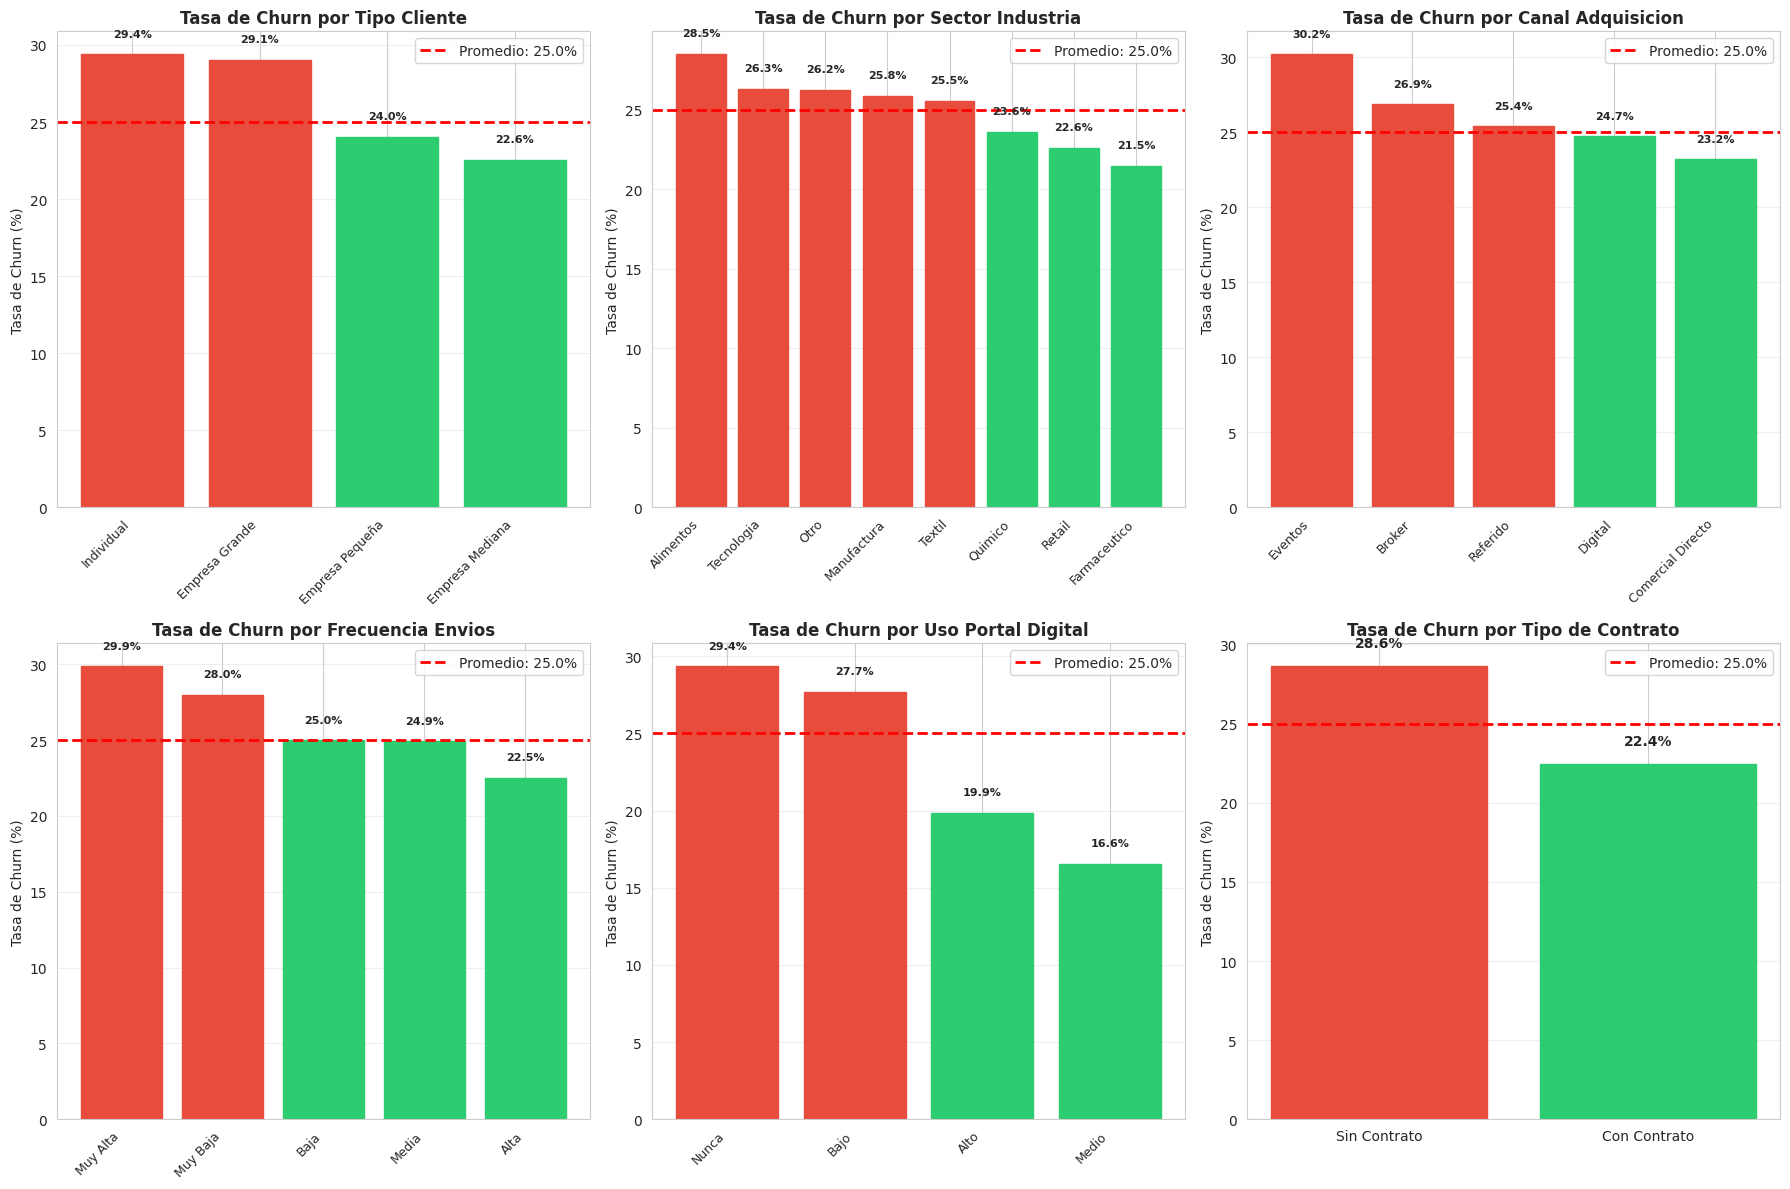

💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/02_churn_por_categorias.png


In [10]:
# ============================================================================
# VISUALIZACIÓN: TASA DE CHURN POR CATEGORÍAS
# ============================================================================

# Variables para graficar (sin tiene_contrato_anual por ahora)
vars_to_plot = ['tipo_cliente', 'sector_industria', 'canal_adquisicion',
                'frecuencia_envios', 'uso_portal_digital']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, var in enumerate(vars_to_plot):
    # Calcular tasa de churn por categoría
    churn_by_cat = df.groupby(var)['churn'].agg(['mean', 'count'])
    churn_by_cat = churn_by_cat.sort_values('mean', ascending=False)

    # Gráfico
    ax = axes[idx]
    bars = ax.bar(range(len(churn_by_cat)), churn_by_cat['mean'] * 100)
    ax.set_xticks(range(len(churn_by_cat)))
    ax.set_xticklabels(churn_by_cat.index, rotation=45, ha='right', fontsize=9)
    ax.set_title(f'Tasa de Churn por {var.replace("_", " ").title()}',
                fontweight='bold', fontsize=12)
    ax.set_ylabel('Tasa de Churn (%)', fontsize=10)
    ax.axhline(y=tasa_churn_promedio, color='red', linestyle='--', linewidth=2,
              label=f'Promedio: {tasa_churn_promedio:.1f}%')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    # Colorear barras
    for i, bar in enumerate(bars):
        if churn_by_cat['mean'].iloc[i] * 100 > tasa_churn_promedio:
            bar.set_color('#e74c3c')  # Rojo
        else:
            bar.set_color('#2ecc71')  # Verde

    # Añadir valores en las barras
    for i, (idx_cat, row) in enumerate(churn_by_cat.iterrows()):
        height = row['mean'] * 100
        ax.text(i, height + 1, f'{height:.1f}%',
               ha='center', va='bottom', fontsize=8, fontweight='bold')

# Gráfico especial para tiene_contrato_anual
ax = axes[5]
churn_by_contrato = df.groupby('tiene_contrato_anual')['churn'].agg(['mean', 'count'])
churn_by_contrato = churn_by_contrato.sort_values('mean', ascending=False)

labels = ['Sin Contrato' if idx == False else 'Con Contrato'
          for idx in churn_by_contrato.index]
bars = ax.bar(range(len(churn_by_contrato)), churn_by_contrato['mean'] * 100)
ax.set_xticks(range(len(churn_by_contrato)))
ax.set_xticklabels(labels, fontsize=10)
ax.set_title('Tasa de Churn por Tipo de Contrato', fontweight='bold', fontsize=12)
ax.set_ylabel('Tasa de Churn (%)', fontsize=10)
ax.axhline(y=tasa_churn_promedio, color='red', linestyle='--', linewidth=2,
          label=f'Promedio: {tasa_churn_promedio:.1f}%')
ax.legend()
ax.grid(axis='y', alpha=0.3)

for i, (idx_cat, row) in enumerate(churn_by_contrato.iterrows()):
    height = row['mean'] * 100
    bars[i].set_color('#e74c3c' if height > tasa_churn_promedio else '#2ecc71')
    ax.text(i, height + 1, f'{height:.1f}%',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(ruta_outputs + '02_churn_por_categorias.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {ruta_outputs}02_churn_por_categorias.png")

In [11]:
# ============================================================================
# ANÁLISIS DE VARIABLES NUMÉRICAS
# ============================================================================

print("=" * 80)
print("📊 VARIABLES NUMÉRICAS - COMPARACIÓN ACTIVOS VS CHURN")
print("=" * 80)

# Variables numéricas importantes
num_vars = ['antiguedad_meses', 'prima_mensual_promedio', 'num_envios_ultimo_mes',
            'dias_sin_actividad', 'num_siniestros_12meses', 'loss_ratio',
            'num_quejas_reclamos', 'satisfaccion_servicio', 'dias_mora_promedio',
            'variacion_facturacion_pct', 'llamadas_comercial_trimestre',
            'emails_abiertos_trimestre']

# Comparación de medias: Activos vs Churn
print("\n📊 COMPARACIÓN DE PROMEDIOS (Activos vs Churn):")
print("=" * 80)

comparison = df.groupby('churn')[num_vars].mean().T
comparison.columns = ['Activos (0)', 'Churn (1)']
comparison['Diferencia'] = comparison['Churn (1)'] - comparison['Activos (0)']
comparison['% Cambio'] = (comparison['Diferencia'] / comparison['Activos (0)']) * 100

# Ordenar por impacto (valor absoluto del % cambio)
comparison['Impacto_Abs'] = comparison['% Cambio'].abs()
comparison = comparison.sort_values('Impacto_Abs', ascending=False)

print(comparison[['Activos (0)', 'Churn (1)', 'Diferencia', '% Cambio']].round(2))

print("\n🔍 TOP 5 VARIABLES CON MAYOR DIFERENCIA:")
top5 = comparison.head(5)
for idx in top5.index:
    cambio = top5.loc[idx, '% Cambio']
    signo = "↑" if cambio > 0 else "↓"
    print(f"   {signo} {idx}: {abs(cambio):.1f}% {'MAYOR' if cambio > 0 else 'MENOR'} en clientes con churn")

📊 VARIABLES NUMÉRICAS - COMPARACIÓN ACTIVOS VS CHURN

📊 COMPARACIÓN DE PROMEDIOS (Activos vs Churn):
                              Activos (0)   Churn (1)  Diferencia  % Cambio
num_quejas_reclamos                  0.65        1.97        1.31    201.23
variacion_facturacion_pct           12.45        0.06      -12.39    -99.52
dias_sin_actividad                  26.58       41.66       15.08     56.72
loss_ratio                          35.47       48.14       12.67     35.72
satisfaccion_servicio                4.15        3.21       -0.94    -22.61
num_siniestros_12meses               1.45        1.59        0.14      9.47
dias_mora_promedio                  11.02       11.96        0.94      8.55
num_envios_ultimo_mes               11.23       12.09        0.86      7.64
prima_mensual_promedio         3211623.74  3387289.15   175665.40      5.47
llamadas_comercial_trimestre         5.07        4.97       -0.10     -2.00
antiguedad_meses                    23.45       23.06       -0.

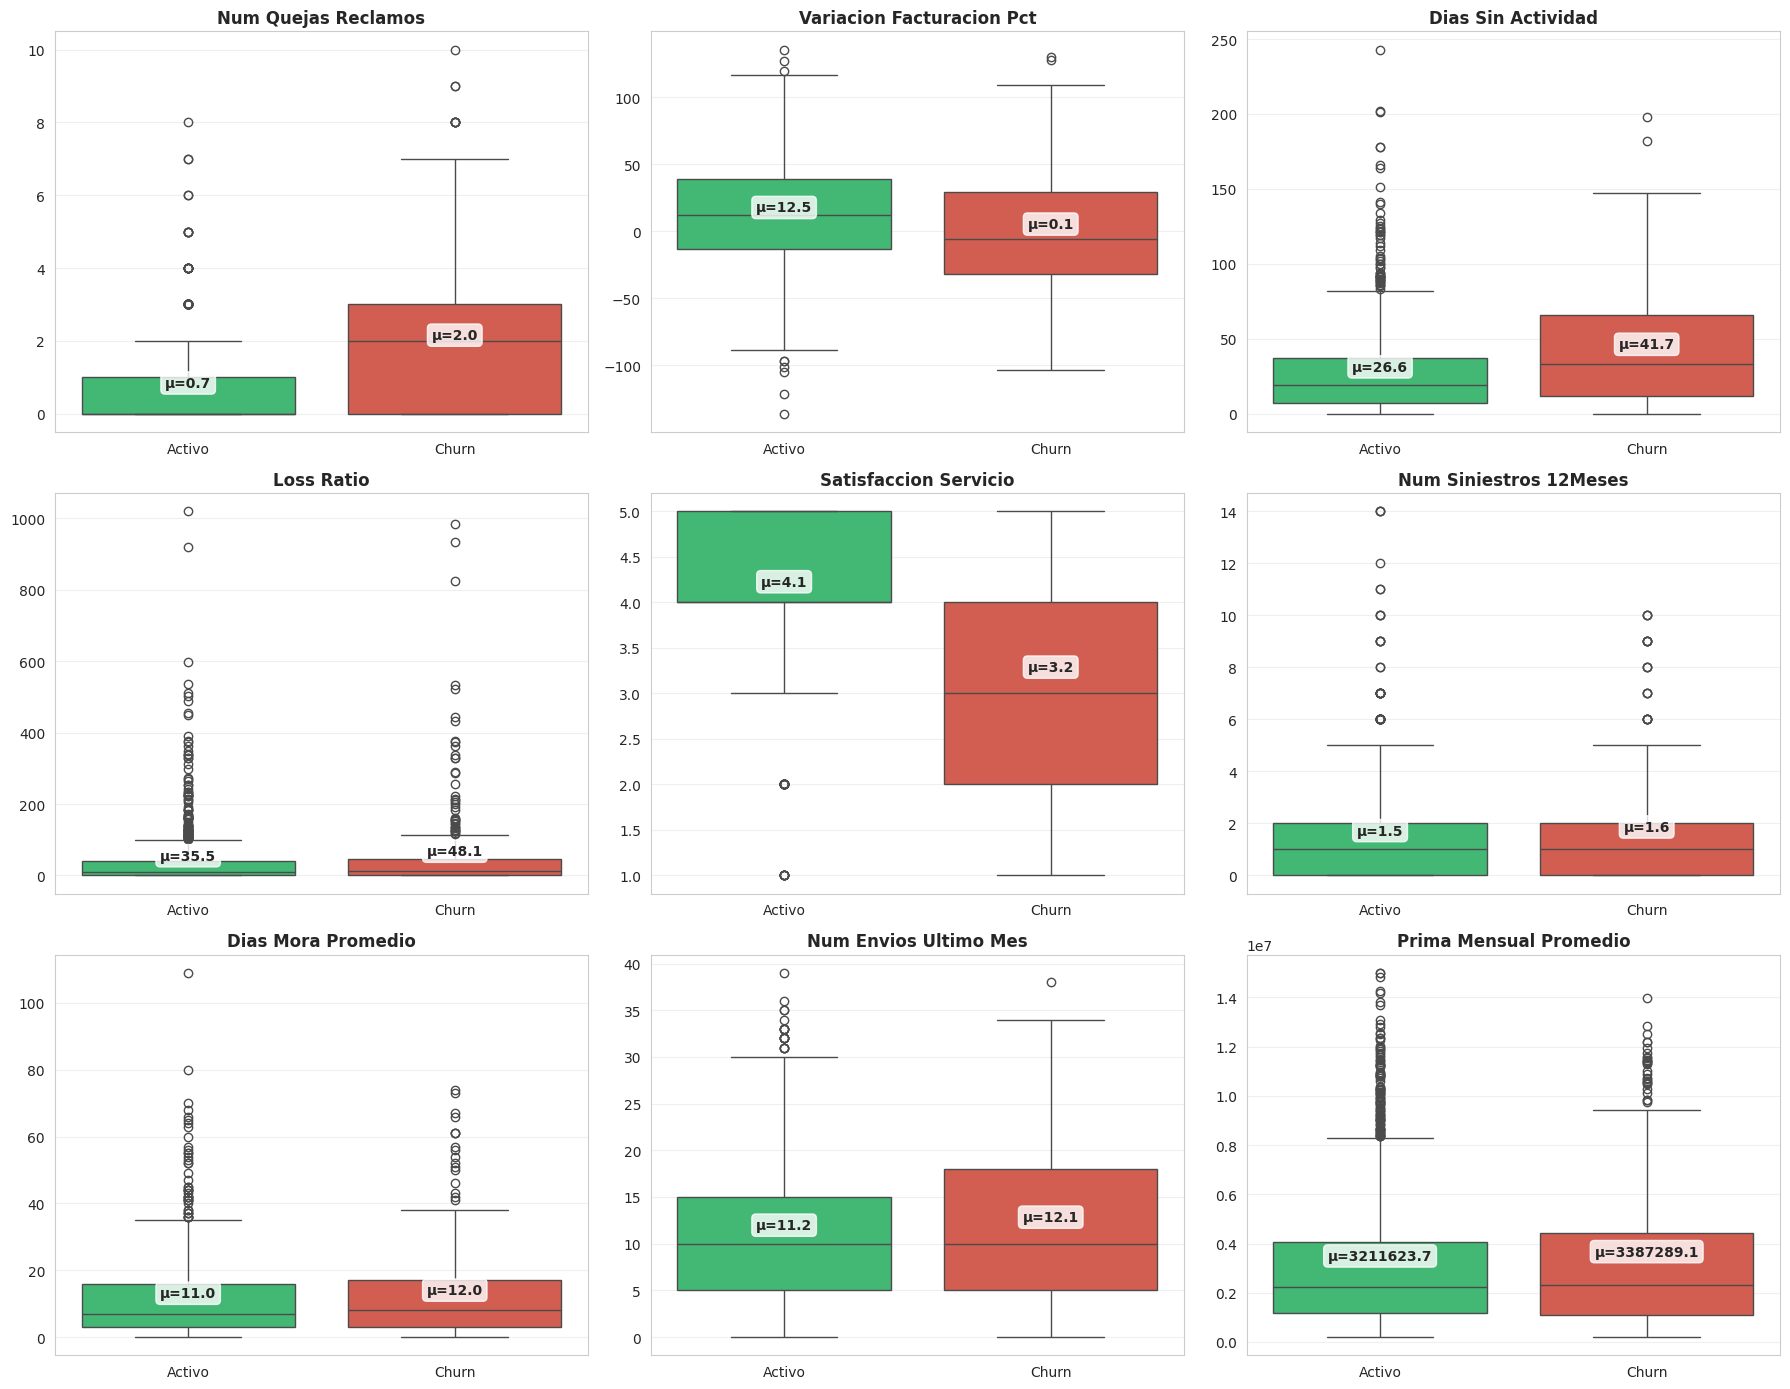

💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/03_comparacion_numericas_churn.png


In [12]:
# ============================================================================
# VISUALIZACIÓN: BOXPLOTS DE VARIABLES NUMÉRICAS
# ============================================================================

# Seleccionar las 9 variables más importantes
top_vars = comparison.head(9).index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, var in enumerate(top_vars):
    ax = axes[idx]

    # Preparar datos
    df_plot = df[[var, 'churn']].copy()
    df_plot['Estado'] = df_plot['churn'].map({0: 'Activo', 1: 'Churn'})

    # Boxplot
    sns.boxplot(data=df_plot, x='Estado', y=var, ax=ax,
                palette=['#2ecc71', '#e74c3c'])

    ax.set_title(f'{var.replace("_", " ").title()}',
                fontweight='bold', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(axis='y', alpha=0.3)

    # Añadir medias
    medias = df_plot.groupby('Estado')[var].mean()
    for i, estado in enumerate(['Activo', 'Churn']):
        ax.text(i, medias[estado], f'μ={medias[estado]:.1f}',
               ha='center', va='bottom', fontweight='bold',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(ruta_outputs + '03_comparacion_numericas_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {ruta_outputs}03_comparacion_numericas_churn.png")


🔗 ANÁLISIS DE CORRELACIÓN CON CHURN

🎯 CORRELACIÓN CON CHURN:
churn                           1.000000
num_quejas_reclamos             0.396191
dias_sin_actividad              0.210705
loss_ratio                      0.062987
num_envios_ultimo_mes           0.045126
dias_mora_promedio              0.033408
num_siniestros_12meses          0.030776
prima_mensual_promedio          0.025470
antiguedad_meses               -0.012509
emails_abiertos_trimestre      -0.018323
llamadas_comercial_trimestre   -0.018681
variacion_facturacion_pct      -0.134684
satisfaccion_servicio          -0.394421
Name: churn, dtype: float64

⚡ CORRELACIONES FUERTES (|r| > 0.3):
   • num_quejas_reclamos: 0.396 (POSITIVA)
   • satisfaccion_servicio: -0.394 (NEGATIVA)


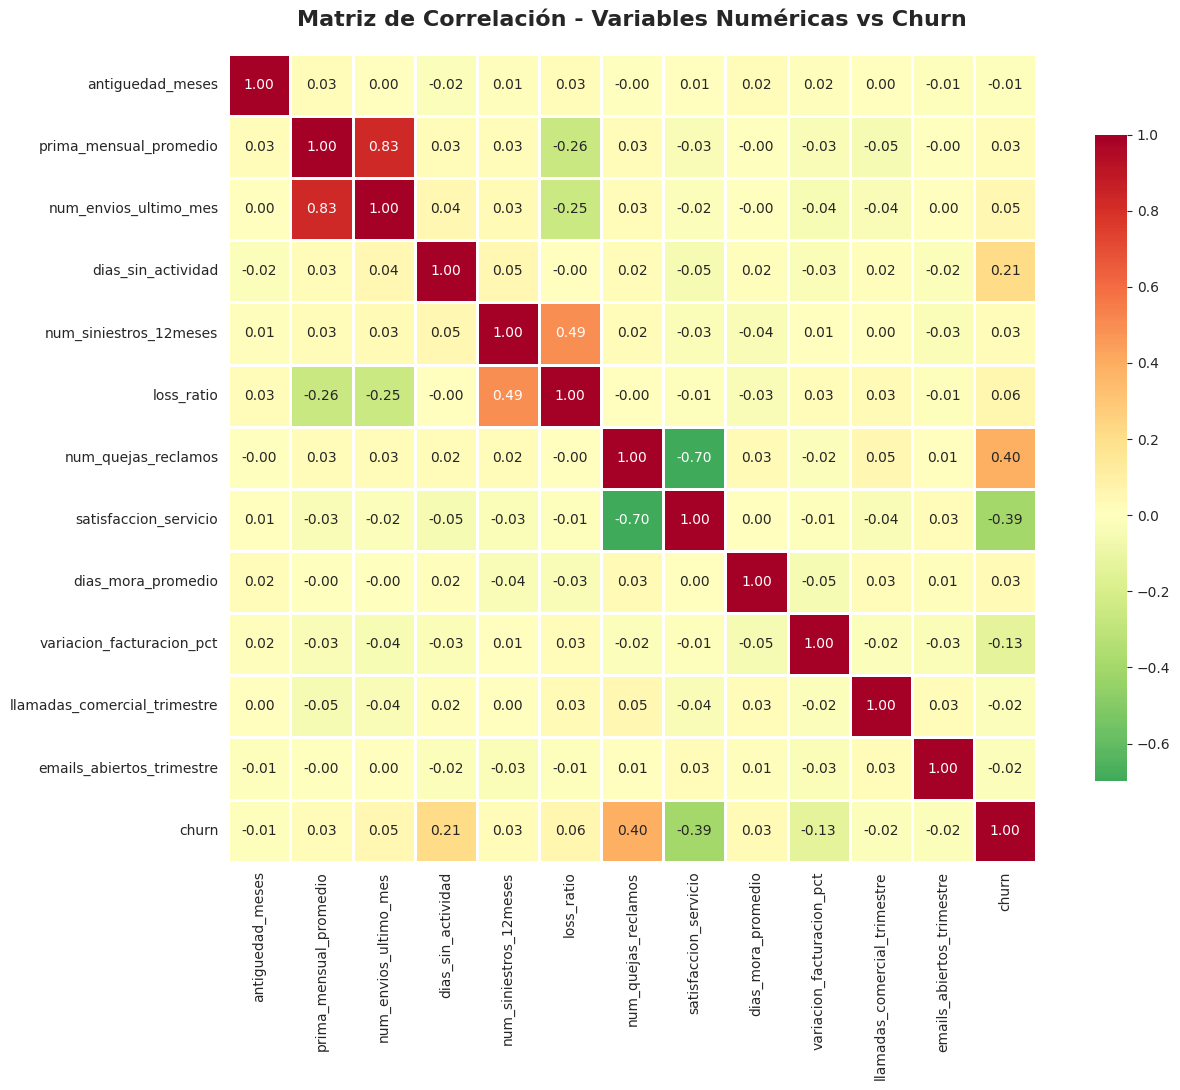


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/05_matriz_correlacion.png


In [13]:
# ============================================================================
# ANÁLISIS DE CORRELACIÓN
# ============================================================================

print("\n" + "=" * 80)
print("🔗 ANÁLISIS DE CORRELACIÓN CON CHURN")
print("=" * 80)

# Calcular matriz de correlación
corr_matrix = df[num_vars + ['churn']].corr()

# Correlación específica con churn
churn_corr = corr_matrix['churn'].sort_values(ascending=False)

print("\n🎯 CORRELACIÓN CON CHURN:")
print("=" * 50)
print(churn_corr)

# Identificar correlaciones fuertes
print("\n⚡ CORRELACIONES FUERTES (|r| > 0.3):")
strong_corr = churn_corr[abs(churn_corr) > 0.3]
strong_corr = strong_corr[strong_corr.index != 'churn']

if len(strong_corr) > 0:
    for var, corr in strong_corr.items():
        direccion = "POSITIVA" if corr > 0 else "NEGATIVA"
        print(f"   • {var}: {corr:.3f} ({direccion})")
else:
    print("   No hay correlaciones fuertes (>0.3)")

# Visualización: Heatmap
plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas vs Churn',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(ruta_outputs + '05_matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}05_matriz_correlacion.png")


⭐ TOP 10 VARIABLES MÁS PREDICTIVAS DE CHURN

📊 RANKING DE FEATURES:
    1. num_quejas_reclamos                 | Correlación:  0.396 | ↑ Mayor en Churn
    2. dias_sin_actividad                  | Correlación:  0.211 | ↑ Mayor en Churn
    3. loss_ratio                          | Correlación:  0.063 | ↑ Mayor en Churn
    4. num_envios_ultimo_mes               | Correlación:  0.045 | ↑ Mayor en Churn
    5. dias_mora_promedio                  | Correlación:  0.033 | ↑ Mayor en Churn
    6. num_siniestros_12meses              | Correlación:  0.031 | ↑ Mayor en Churn
    7. prima_mensual_promedio              | Correlación:  0.025 | ↑ Mayor en Churn
    8. llamadas_comercial_trimestre        | Correlación: -0.019 | ↓ Menor en Churn
    9. emails_abiertos_trimestre           | Correlación: -0.018 | ↓ Menor en Churn
   10. antiguedad_meses                    | Correlación: -0.013 | ↓ Menor en Churn


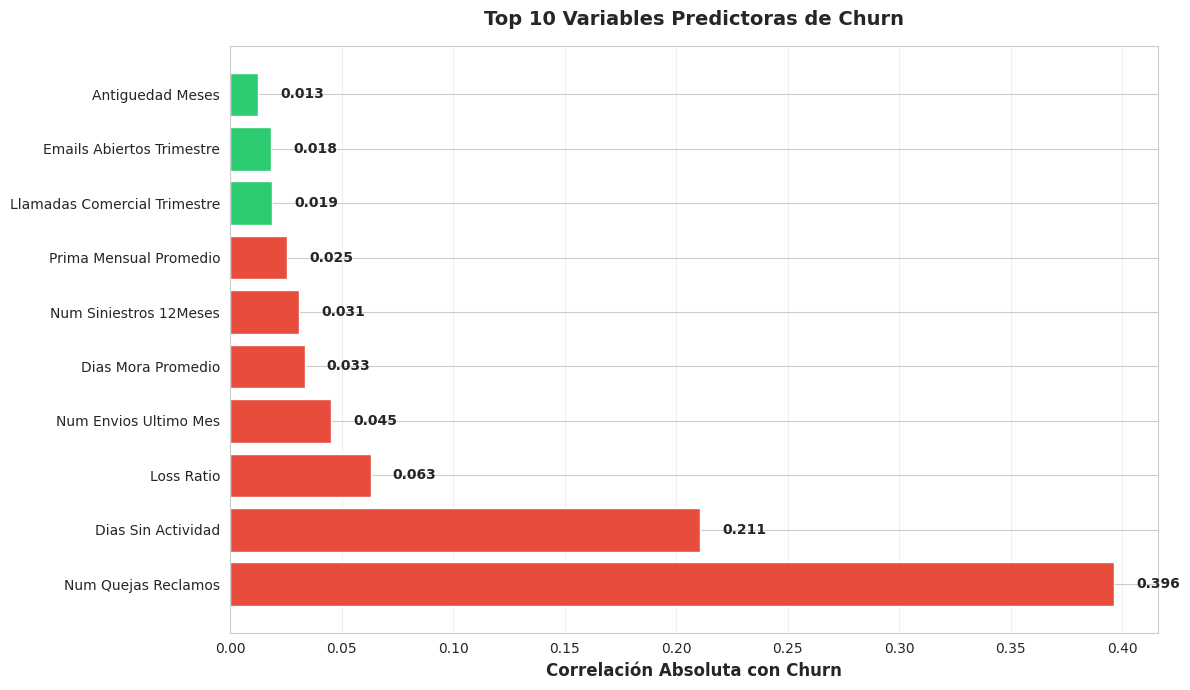


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/06_top_features_churn.png


In [14]:
# ============================================================================
# IDENTIFICAR TOP FEATURES PARA EL MODELO
# ============================================================================

print("\n" + "=" * 80)
print("⭐ TOP 10 VARIABLES MÁS PREDICTIVAS DE CHURN")
print("=" * 80)

# Top 10 por correlación absoluta (excluyendo churn)
top_features = churn_corr[1:11].abs().sort_values(ascending=False)

print("\n📊 RANKING DE FEATURES:")
for i, (feature, corr_value) in enumerate(top_features.items(), 1):
    corr_real = churn_corr[feature]
    tipo = "↑ Mayor en Churn" if corr_real > 0 else "↓ Menor en Churn"
    print(f"   {i:2d}. {feature:35s} | Correlación: {corr_real:6.3f} | {tipo}")

# Visualización
plt.figure(figsize=(12, 7))
colors = ['#e74c3c' if churn_corr[feat] > 0 else '#2ecc71'
          for feat in top_features.index]

plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)),
          [f.replace('_', ' ').title() for f in top_features.index])
plt.xlabel('Correlación Absoluta con Churn', fontsize=12, fontweight='bold')
plt.title('Top 10 Variables Predictoras de Churn',
         fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (feat, val) in enumerate(top_features.items()):
    plt.text(val + 0.01, i, f'{val:.3f}',
            va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(ruta_outputs + '06_top_features_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}06_top_features_churn.png")

In [15]:
# ============================================================================
# RESUMEN DE INSIGHTS DEL EDA
# ============================================================================

print("\n" + "=" * 80)
print("📝 RESUMEN EJECUTIVO - INSIGHTS DEL EDA")
print("=" * 80)

print(f"""
1. BALANCE DEL DATASET:
   ✓ Total de clientes analizados: {len(df):,}
   ✓ Tasa de churn: {churn_pct[1]:.1f}%
   ✓ Estado: {'BALANCEADO - Ideal para modelado' if churn_pct[1] >= 15 and churn_pct[1] <= 35 else 'Requiere técnicas de balanceo'}

2. TOP 5 VARIABLES MÁS PREDICTIVAS:
""")

for i, feat in enumerate(top_features.head(5).index, 1):
    corr_val = churn_corr[feat]
    print(f"   {i}. {feat.replace('_', ' ').title()}: {corr_val:.3f}")

print(f"""
3. PATRONES CLAVE EN CLIENTES CON CHURN:
   • Días sin actividad: {comparison.loc['dias_sin_actividad', '% Cambio']:.1f}% MAYOR
   • Satisfacción del servicio: {comparison.loc['satisfaccion_servicio', '% Cambio']:.1f}% MENOR
   • Número de quejas: {comparison.loc['num_quejas_reclamos', '% Cambio']:.1f}% MAYOR
   • Variación de facturación: {comparison.loc['variacion_facturacion_pct', '% Cambio']:.1f}% MENOR

4. SEGMENTOS DE ALTO RIESGO IDENTIFICADOS:
   • Clientes sin contrato anual
   • Baja frecuencia de envíos
   • Bajo uso del portal digital
   • Poca interacción con el comercial

5. ARCHIVOS GENERADOS:
   ✓ 01_distribucion_churn.png
   ✓ 02_churn_por_categorias.png
   ✓ 03_comparacion_numericas_churn.png
   ✓ 04_distribuciones_variables.png
   ✓ 05_matriz_correlacion.png
   ✓ 06_top_features_churn.png

6. PRÓXIMOS PASOS:
   → Preprocesamiento de datos
   → Feature engineering
   → Entrenamiento de modelos ML
   → Evaluación y selección del mejor modelo
   → Predicciones sobre clientes activos
""")

print("=" * 80)
print("✅ EDA COMPLETADO EXITOSAMENTE")
print("=" * 80)


📝 RESUMEN EJECUTIVO - INSIGHTS DEL EDA

1. BALANCE DEL DATASET:
   ✓ Total de clientes analizados: 1,500
   ✓ Tasa de churn: 25.0%
   ✓ Estado: BALANCEADO - Ideal para modelado

2. TOP 5 VARIABLES MÁS PREDICTIVAS:

   1. Num Quejas Reclamos: 0.396
   2. Dias Sin Actividad: 0.211
   3. Loss Ratio: 0.063
   4. Num Envios Ultimo Mes: 0.045
   5. Dias Mora Promedio: 0.033

3. PATRONES CLAVE EN CLIENTES CON CHURN:
   • Días sin actividad: 56.7% MAYOR
   • Satisfacción del servicio: -22.6% MENOR
   • Número de quejas: 201.2% MAYOR
   • Variación de facturación: -99.5% MENOR

4. SEGMENTOS DE ALTO RIESGO IDENTIFICADOS:
   • Clientes sin contrato anual
   • Baja frecuencia de envíos
   • Bajo uso del portal digital
   • Poca interacción con el comercial

5. ARCHIVOS GENERADOS:
   ✓ 01_distribucion_churn.png
   ✓ 02_churn_por_categorias.png
   ✓ 03_comparacion_numericas_churn.png
   ✓ 04_distribuciones_variables.png
   ✓ 05_matriz_correlacion.png
   ✓ 06_top_features_churn.png

6. PRÓXIMOS PASO

In [16]:
# ============================================================================
# NOTEBOOK 2: PREPROCESSING Y FEATURE ENGINEERING
# ============================================================================

print("=" * 80)
print("🔧 PREPROCESSING Y FEATURE ENGINEERING")
print("=" * 80)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Trabajar con una copia del dataframe
df_prep = df.copy()

print(f"\n✅ Dataset cargado: {len(df_prep):,} registros")
print(f"📊 Columnas iniciales: {len(df_prep.columns)}")

🔧 PREPROCESSING Y FEATURE ENGINEERING

✅ Dataset cargado: 1,500 registros
📊 Columnas iniciales: 35


In [17]:
# ============================================================================
# VERIFICAR Y MANEJAR VALORES NULOS
# ============================================================================

print("\n" + "=" * 80)
print("🔍 TRATAMIENTO DE VALORES NULOS")
print("=" * 80)

# Verificar nulos
nulos_antes = df_prep.isnull().sum().sum()

if nulos_antes > 0:
    print(f"⚠️ Se encontraron {nulos_antes} valores nulos")

    # Imputación inteligente
    for col in df_prep.columns:
        if df_prep[col].isnull().sum() > 0:
            if df_prep[col].dtype in ['int64', 'float64']:
                # Numérica: rellenar con mediana
                mediana = df_prep[col].median()
                df_prep[col].fillna(mediana, inplace=True)
                print(f"  ✓ {col}: {df_prep[col].isnull().sum()} nulos → rellenados con mediana ({mediana:.2f})")
            else:
                # Categórica: rellenar con moda
                moda = df_prep[col].mode()[0]
                df_prep[col].fillna(moda, inplace=True)
                print(f"  ✓ {col}: rellenado con moda ('{moda}')")

    nulos_despues = df_prep.isnull().sum().sum()
    print(f"\n✅ Valores nulos: {nulos_antes} → {nulos_despues}")
else:
    print("✅ No hay valores nulos - Dataset limpio!")

# Verificar duplicados
duplicados = df_prep.duplicated(subset=['cliente_id']).sum()
print(f"\n🔄 Duplicados por cliente_id: {duplicados}")
if duplicados > 0:
    df_prep = df_prep.drop_duplicates(subset=['cliente_id'])
    print(f"✓ Duplicados eliminados. Registros finales: {len(df_prep):,}")


🔍 TRATAMIENTO DE VALORES NULOS
✅ No hay valores nulos - Dataset limpio!

🔄 Duplicados por cliente_id: 0


In [18]:
# ============================================================================
# FEATURE ENGINEERING - CREAR VARIABLES DERIVADAS
# ============================================================================

print("\n" + "=" * 80)
print("🔧 FEATURE ENGINEERING - CREACIÓN DE VARIABLES")
print("=" * 80)

# Contador de features creadas
features_creadas = 0

# 1. Features temporales
if 'fecha_primera_poliza' in df_prep.columns:
    df_prep['fecha_primera_poliza'] = pd.to_datetime(df_prep['fecha_primera_poliza'])
    df_prep['ano_inicio'] = df_prep['fecha_primera_poliza'].dt.year
    df_prep['mes_inicio'] = df_prep['fecha_primera_poliza'].dt.month
    print("✓ ano_inicio, mes_inicio")
    features_creadas += 2

# 2. Ratio de actividad
if 'num_envios_ultimo_mes' in df_prep.columns and 'antiguedad_meses' in df_prep.columns:
    df_prep['ratio_actividad'] = df_prep['num_envios_ultimo_mes'] / (df_prep['antiguedad_meses'] + 1)
    print("✓ ratio_actividad (envíos/mes promedio)")
    features_creadas += 1

# 3. Cliente de alto valor
if 'prima_mensual_promedio' in df_prep.columns:
    umbral_alto_valor = df_prep['prima_mensual_promedio'].quantile(0.75)
    df_prep['es_alto_valor'] = (df_prep['prima_mensual_promedio'] > umbral_alto_valor).astype(int)
    print(f"✓ es_alto_valor (prima > {umbral_alto_valor:,.0f})")
    features_creadas += 1

# 4. Cliente problemático
if 'num_quejas_reclamos' in df_prep.columns and 'num_siniestros_12meses' in df_prep.columns:
    df_prep['es_problematico'] = (
        (df_prep['num_quejas_reclamos'] >= 3) |
        (df_prep['num_siniestros_12meses'] >= 4)
    ).astype(int)
    print("✓ es_problematico (quejas>=3 o siniestros>=4)")
    features_creadas += 1

# 5. Indicador de inactividad
if 'dias_sin_actividad' in df_prep.columns:
    df_prep['inactivo'] = (df_prep['dias_sin_actividad'] > 60).astype(int)
    print("✓ inactivo (>60 días sin actividad)")
    features_creadas += 1

# 6. Score de satisfacción ajustado
if 'satisfaccion_servicio' in df_prep.columns and 'num_quejas_reclamos' in df_prep.columns:
    df_prep['satisfaccion_ajustada'] = df_prep['satisfaccion_servicio'] - (df_prep['num_quejas_reclamos'] * 0.5)
    df_prep['satisfaccion_ajustada'] = df_prep['satisfaccion_ajustada'].clip(lower=1, upper=5)
    print("✓ satisfaccion_ajustada (ajustada por quejas)")
    features_creadas += 1

# 7. Tendencia de facturación
if 'variacion_facturacion_pct' in df_prep.columns:
    df_prep['tendencia_negativa'] = (df_prep['variacion_facturacion_pct'] < -20).astype(int)
    print("✓ tendencia_negativa (variación < -20%)")
    features_creadas += 1

# 8. Engagement score (combinado)
if all(col in df_prep.columns for col in ['llamadas_comercial_trimestre', 'emails_abiertos_trimestre']):
    df_prep['engagement_score'] = (
        df_prep['llamadas_comercial_trimestre'] * 2 +
        df_prep['emails_abiertos_trimestre']
    )
    print("✓ engagement_score (interacción total)")
    features_creadas += 1

# 9. Ratio de siniestralidad sobre envíos
if 'num_siniestros_12meses' in df_prep.columns and 'num_envios_trimestre' in df_prep.columns:
    df_prep['ratio_siniestros'] = df_prep['num_siniestros_12meses'] / (df_prep['num_envios_trimestre'] * 4 + 1)
    print("✓ ratio_siniestros (siniestros/envíos)")
    features_creadas += 1

# 10. Categoría de antigüedad
if 'antiguedad_meses' in df_prep.columns:
    df_prep['categoria_antiguedad'] = pd.cut(
        df_prep['antiguedad_meses'],
        bins=[0, 6, 12, 24, 48, 999],
        labels=['Muy_Nuevo', 'Nuevo', 'Establecido', 'Maduro', 'Veterano']
    )
    print("✓ categoria_antiguedad (segmentación temporal)")
    features_creadas += 1

print(f"\n✅ Total de features creadas: {features_creadas}")
print(f"📊 Columnas totales ahora: {len(df_prep.columns)}")


🔧 FEATURE ENGINEERING - CREACIÓN DE VARIABLES
✓ ano_inicio, mes_inicio
✓ ratio_actividad (envíos/mes promedio)
✓ es_alto_valor (prima > 4,147,108)
✓ es_problematico (quejas>=3 o siniestros>=4)
✓ inactivo (>60 días sin actividad)
✓ satisfaccion_ajustada (ajustada por quejas)
✓ tendencia_negativa (variación < -20%)
✓ engagement_score (interacción total)
✓ ratio_siniestros (siniestros/envíos)
✓ categoria_antiguedad (segmentación temporal)

✅ Total de features creadas: 11
📊 Columnas totales ahora: 46


In [19]:
# ============================================================================
# SELECCIÓN DE FEATURES PARA EL MODELO
# ============================================================================

print("\n" + "=" * 80)
print("🎯 SELECCIÓN DE FEATURES")
print("=" * 80)

# Columnas a EXCLUIR del modelo
columnas_excluir = [
    'cliente_id',
    'nombre_comercial',
    'fecha_primera_poliza',
    'churn'  # Variable objetivo
]

# Identificar tipos de variables
todas_columnas = [col for col in df_prep.columns if col not in columnas_excluir]

# Separar por tipo
categoricas = df_prep[todas_columnas].select_dtypes(include=['object', 'category']).columns.tolist()
numericas = df_prep[todas_columnas].select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

print(f"\n📊 RESUMEN DE FEATURES:")
print(f"   • Variables categóricas: {len(categoricas)}")
print(f"   • Variables numéricas: {len(numericas)}")
print(f"   • Total features: {len(categoricas) + len(numericas)}")

print(f"\n🔤 Variables categóricas ({len(categoricas)}):")
for i, cat in enumerate(categoricas, 1):
    unique_vals = df_prep[cat].nunique()
    print(f"   {i:2d}. {cat:35s} ({unique_vals} categorías)")

print(f"\n🔢 Variables numéricas ({len(numericas)}):")
for i, num in enumerate(numericas, 1):
    print(f"   {i:2d}. {num}")


🎯 SELECCIÓN DE FEATURES

📊 RESUMEN DE FEATURES:
   • Variables categóricas: 11
   • Variables numéricas: 29
   • Total features: 40

🔤 Variables categóricas (11):
    1. tipo_cliente                        (4 categorías)
    2. sector_industria                    (8 categorías)
    3. pais_origen                         (8 categorías)
    4. region                              (5 categorías)
    5. ciudad                              (7 categorías)
    6. canal_adquisicion                   (5 categorías)
    7. ejecutivo_asignado                  (5 categorías)
    8. frecuencia_envios                   (5 categorías)
    9. metodo_pago                         (4 categorías)
   10. uso_portal_digital                  (4 categorías)
   11. categoria_antiguedad                (5 categorías)

🔢 Variables numéricas (29):
    1. antiguedad_meses
    2. tiene_contrato_anual
    3. numero_polizas_activas
    4. prima_mensual_promedio
    5. prima_total_12meses
    6. num_envios_ultimo_mes
 

In [20]:
# ============================================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# ============================================================================

print("\n" + "=" * 80)
print("🔤 CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# Crear copia para transformar
df_encoded = df_prep.copy()

# Label Encoding para variables categóricas
label_encoders = {}

for col in categoricas:
    le = LabelEncoder()
    # Convertir a string por si hay valores booleanos o mixtos
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

    n_categorias = len(le.classes_)
    print(f"✓ {col:35s} → {n_categorias} categorías codificadas")

# Guardar encoders para usar en predicciones futuras
import os
os.makedirs(ruta_base + 'models/', exist_ok=True)

with open(ruta_base + 'models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print(f"\n✅ Encoders guardados en: models/label_encoders.pkl")
print(f"📊 Variables codificadas: {len(label_encoders)}")


🔤 CODIFICACIÓN DE VARIABLES CATEGÓRICAS
✓ tipo_cliente                        → 4 categorías codificadas
✓ sector_industria                    → 8 categorías codificadas
✓ pais_origen                         → 8 categorías codificadas
✓ region                              → 5 categorías codificadas
✓ ciudad                              → 7 categorías codificadas
✓ canal_adquisicion                   → 5 categorías codificadas
✓ ejecutivo_asignado                  → 5 categorías codificadas
✓ frecuencia_envios                   → 5 categorías codificadas
✓ metodo_pago                         → 4 categorías codificadas
✓ uso_portal_digital                  → 4 categorías codificadas
✓ categoria_antiguedad                → 5 categorías codificadas

✅ Encoders guardados en: models/label_encoders.pkl
📊 Variables codificadas: 11


In [21]:
# ============================================================================
# PREPARAR DATOS PARA EL MODELO
# ============================================================================

print("\n" + "=" * 80)
print("📊 PREPARACIÓN FINAL DE DATOS")
print("=" * 80)

# Features finales
features_finales = categoricas + numericas

# Preparar X (features) y y (target)
X = df_encoded[features_finales]
y = df_encoded['churn']

print(f"✅ Features (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")

print(f"\n🎯 Distribución del target:")
print(y.value_counts())
print(y.value_counts(normalize=True))

# Verificar que no hay nulos en X
nulos_X = X.isnull().sum().sum()
print(f"\n🔍 Valores nulos en X: {nulos_X}")

if nulos_X > 0:
    print("⚠️ ADVERTENCIA: Hay valores nulos en las features")
    print(X.isnull().sum()[X.isnull().sum() > 0])


📊 PREPARACIÓN FINAL DE DATOS
✅ Features (X): (1500, 40)
✅ Target (y): (1500,)

🎯 Distribución del target:
churn
0    1125
1     375
Name: count, dtype: int64
churn
0    0.75
1    0.25
Name: proportion, dtype: float64

🔍 Valores nulos en X: 0


In [22]:
# ============================================================================
# DIVISIÓN TRAIN/TEST
# ============================================================================

print("\n" + "=" * 80)
print("✂️ DIVISIÓN TRAIN/TEST")
print("=" * 80)

# Split 80% train, 20% test
# stratify asegura que ambos sets tengan la misma proporción de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"✅ DIVISIÓN COMPLETADA:")
print(f"   Train set: {X_train.shape[0]:,} registros ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Test set:  {X_test.shape[0]:,} registros ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Features:  {X_train.shape[1]}")

print(f"\n🎯 DISTRIBUCIÓN DE CHURN EN TRAIN:")
train_dist = y_train.value_counts(normalize=True) * 100
print(f"   Activos: {train_dist[0]:.1f}%")
print(f"   Churn:   {train_dist[1]:.1f}%")

print(f"\n🎯 DISTRIBUCIÓN DE CHURN EN TEST:")
test_dist = y_test.value_counts(normalize=True) * 100
print(f"   Activos: {test_dist[0]:.1f}%")
print(f"   Churn:   {test_dist[1]:.1f}%")

# Verificar que el stratify funcionó
diferencia = abs(train_dist[1] - test_dist[1])
if diferencia < 1:
    print(f"\n✅ Stratify funcionó correctamente (diferencia: {diferencia:.2f}%)")
else:
    print(f"\n⚠️ Revisar stratify (diferencia: {diferencia:.2f}%)")


✂️ DIVISIÓN TRAIN/TEST
✅ DIVISIÓN COMPLETADA:
   Train set: 1,200 registros (80.0%)
   Test set:  300 registros (20.0%)
   Features:  40

🎯 DISTRIBUCIÓN DE CHURN EN TRAIN:
   Activos: 75.0%
   Churn:   25.0%

🎯 DISTRIBUCIÓN DE CHURN EN TEST:
   Activos: 75.0%
   Churn:   25.0%

✅ Stratify funcionó correctamente (diferencia: 0.00%)


In [23]:
# ============================================================================
# ESCALADO DE VARIABLES NUMÉRICAS
# ============================================================================

print("\n" + "=" * 80)
print("⚖️ ESCALADO DE VARIABLES NUMÉRICAS")
print("=" * 80)

# Identificar columnas numéricas (excluyendo las booleanas que ya son 0/1)
num_cols_to_scale = []

for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64']:
        # Solo escalar si tiene rango amplio (no es binaria 0/1)
        if X_train[col].nunique() > 2:
            num_cols_to_scale.append(col)

print(f"📊 Variables a escalar: {len(num_cols_to_scale)}")
for i, col in enumerate(num_cols_to_scale, 1):
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    print(f"   {i:2d}. {col:35s} (rango: {min_val:.1f} - {max_val:.1f})")

# StandardScaler: estandariza variables (media=0, std=1)
scaler = StandardScaler()

# Crear copias de los datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar solo las columnas numéricas seleccionadas
X_train_scaled[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test_scaled[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

print(f"\n✅ {len(num_cols_to_scale)} variables escaladas con StandardScaler")

# Verificar escalado
print(f"\n🔍 VERIFICACIÓN DEL ESCALADO (Train):")
print(f"   Media antes del escalado: {X_train[num_cols_to_scale].mean().mean():.2f}")
print(f"   Media después del escalado: {X_train_scaled[num_cols_to_scale].mean().mean():.2f}")
print(f"   Std antes del escalado: {X_train[num_cols_to_scale].std().mean():.2f}")
print(f"   Std después del escalado: {X_train_scaled[num_cols_to_scale].std().mean():.2f}")

# Guardar scaler
with open(ruta_base + 'models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(f"\n💾 Scaler guardado en: models/scaler.pkl")


⚖️ ESCALADO DE VARIABLES NUMÉRICAS
📊 Variables a escalar: 35
    1. tipo_cliente                        (rango: 0.0 - 3.0)
    2. sector_industria                    (rango: 0.0 - 7.0)
    3. pais_origen                         (rango: 0.0 - 7.0)
    4. region                              (rango: 0.0 - 4.0)
    5. ciudad                              (rango: 0.0 - 6.0)
    6. canal_adquisicion                   (rango: 0.0 - 4.0)
    7. ejecutivo_asignado                  (rango: 0.0 - 4.0)
    8. frecuencia_envios                   (rango: 0.0 - 4.0)
    9. metodo_pago                         (rango: 0.0 - 3.0)
   10. uso_portal_digital                  (rango: 0.0 - 3.0)
   11. categoria_antiguedad                (rango: 0.0 - 4.0)
   12. antiguedad_meses                    (rango: 1.0 - 108.0)
   13. numero_polizas_activas              (rango: 0.0 - 8.0)
   14. prima_mensual_promedio              (rango: 200000.0 - 15000000.0)
   15. prima_total_12meses                 (rango: 20372

In [24]:
# ============================================================================
# GUARDAR DATOS PROCESADOS
# ============================================================================

print("\n" + "=" * 80)
print("💾 GUARDANDO DATOS PROCESADOS")
print("=" * 80)

# Crear carpeta data si no existe
os.makedirs(ruta_base + 'data/', exist_ok=True)

# Guardar datasets
X_train_scaled.to_csv(ruta_base + 'data/X_train.csv', index=False)
X_test_scaled.to_csv(ruta_base + 'data/X_test.csv', index=False)
y_train.to_csv(ruta_base + 'data/y_train.csv', index=False)
y_test.to_csv(ruta_base + 'data/y_test.csv', index=False)

print("✅ Datasets guardados:")
print(f"   ✓ data/X_train.csv ({X_train_scaled.shape})")
print(f"   ✓ data/X_test.csv ({X_test_scaled.shape})")
print(f"   ✓ data/y_train.csv ({y_train.shape})")
print(f"   ✓ data/y_test.csv ({y_test.shape})")

# Guardar lista de features
with open(ruta_base + 'models/features.pkl', 'wb') as f:
    pickle.dump(features_finales, f)

print(f"\n✓ Lista de features guardada: models/features.pkl")

# Guardar también el dataframe completo preprocesado (para referencia)
df_prep.to_csv(ruta_base + 'data/dataset_preprocesado.csv', index=False)
print(f"✓ Dataset completo guardado: data/dataset_preprocesado.csv")


💾 GUARDANDO DATOS PROCESADOS
✅ Datasets guardados:
   ✓ data/X_train.csv ((1200, 40))
   ✓ data/X_test.csv ((300, 40))
   ✓ data/y_train.csv ((1200,))
   ✓ data/y_test.csv ((300,))

✓ Lista de features guardada: models/features.pkl
✓ Dataset completo guardado: data/dataset_preprocesado.csv


In [25]:
# ============================================================================
# RESUMEN FINAL DEL PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("📝 RESUMEN DEL PREPROCESSING")
print("=" * 80)

print(f"""
1. DATOS PROCESADOS:
   ✓ Total registros originales: {len(df):,}
   ✓ Total registros finales: {len(df_prep):,}
   ✓ Features originales: 35
   ✓ Features finales: {len(features_finales)}
   ✓ Features creadas (engineering): {features_creadas}

2. COMPOSICIÓN DE FEATURES:
   ✓ Variables categóricas: {len(categoricas)} (codificadas con LabelEncoder)
   ✓ Variables numéricas: {len(numericas)}
   ✓ Variables escaladas: {len(num_cols_to_scale)}

3. TRAIN/TEST SPLIT:
   ✓ Train: {len(X_train):,} registros (80%)
   ✓ Test: {len(X_test):,} registros (20%)
   ✓ Stratify: Activado (balance preservado)

4. BALANCE DE CLASES:
   Train: {train_dist[0]:.1f}% Activos, {train_dist[1]:.1f}% Churn
   Test:  {test_dist[0]:.1f}% Activos, {test_dist[1]:.1f}% Churn

5. TRANSFORMACIONES APLICADAS:
   ✓ Feature Engineering: {features_creadas} nuevas variables
   ✓ Label Encoding: {len(categoricas)} variables categóricas
   ✓ Standard Scaling: {len(num_cols_to_scale)} variables numéricas
   ✓ Sin valores nulos: 100% datos completos

6. ARCHIVOS GENERADOS:
   ✓ data/X_train.csv
   ✓ data/X_test.csv
   ✓ data/y_train.csv
   ✓ data/y_test.csv
   ✓ data/dataset_preprocesado.csv
   ✓ models/label_encoders.pkl
   ✓ models/scaler.pkl
   ✓ models/features.pkl

7. FEATURES TOP CREADAS:
   • ratio_actividad: Envíos/mes promedio
   • es_alto_valor: Cliente premium (top 25%)
   • es_problematico: Alta siniestralidad o quejas
   • inactivo: >60 días sin actividad
   • satisfaccion_ajustada: Satisfacción - quejas
   • tendencia_negativa: Caída >20% facturación
   • engagement_score: Interacción comercial total
   • ratio_siniestros: Siniestros/envíos
   • categoria_antiguedad: Segmento temporal

8. CALIDAD DE DATOS:
   ✓ Sin duplicados
   ✓ Sin valores nulos
   ✓ Tipos de datos consistentes
   ✓ Rangos validados
   ✓ Outliers preservados (útiles para el modelo)
""")

print("=" * 80)
print("✅ PREPROCESSING COMPLETADO EXITOSAMENTE")
print("=" * 80)
print("\n📌 PRÓXIMO PASO: Entrenamiento de Modelos ML")
print("   Vamos a probar múltiples algoritmos y seleccionar el mejor")


📝 RESUMEN DEL PREPROCESSING

1. DATOS PROCESADOS:
   ✓ Total registros originales: 1,500
   ✓ Total registros finales: 1,500
   ✓ Features originales: 35
   ✓ Features finales: 40
   ✓ Features creadas (engineering): 11

2. COMPOSICIÓN DE FEATURES:
   ✓ Variables categóricas: 11 (codificadas con LabelEncoder)
   ✓ Variables numéricas: 29
   ✓ Variables escaladas: 35

3. TRAIN/TEST SPLIT:
   ✓ Train: 1,200 registros (80%)
   ✓ Test: 300 registros (20%)
   ✓ Stratify: Activado (balance preservado)

4. BALANCE DE CLASES:
   Train: 75.0% Activos, 25.0% Churn
   Test:  75.0% Activos, 25.0% Churn

5. TRANSFORMACIONES APLICADAS:
   ✓ Feature Engineering: 11 nuevas variables
   ✓ Label Encoding: 11 variables categóricas
   ✓ Standard Scaling: 35 variables numéricas
   ✓ Sin valores nulos: 100% datos completos

6. ARCHIVOS GENERADOS:
   ✓ data/X_train.csv
   ✓ data/X_test.csv
   ✓ data/y_train.csv
   ✓ data/y_test.csv
   ✓ data/dataset_preprocesado.csv
   ✓ models/label_encoders.pkl
   ✓ model

In [26]:
# ============================================================================
# NOTEBOOK 3: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ML
# ============================================================================

print("=" * 80)
print("🤖 ENTRENAMIENTO DE MODELOS DE MACHINE LEARNING")
print("=" * 80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Métricas y evaluación
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# Rutas
ruta_base = '/content/drive/MyDrive/dbs portfolio/Churn Model/'
ruta_outputs = ruta_base + 'outputs/'
ruta_models = ruta_base + 'models/'

print("\n📂 Cargando datos procesados...")

# Cargar datos
X_train = pd.read_csv(ruta_base + 'data/X_train.csv')
X_test = pd.read_csv(ruta_base + 'data/X_test.csv')
y_train = pd.read_csv(ruta_base + 'data/y_train.csv')['churn'].values
y_test = pd.read_csv(ruta_base + 'data/y_test.csv')['churn'].values

print(f"✅ Datos cargados exitosamente:")
print(f"   Train: {X_train.shape[0]:,} registros, {X_train.shape[1]} features")
print(f"   Test:  {X_test.shape[0]:,} registros, {X_test.shape[1]} features")
print(f"\n🎯 Balance de clases:")
print(f"   Train - Churn: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.1f}%)")
print(f"   Test  - Churn: {(y_test == 1).sum():,} ({(y_test == 1).mean()*100:.1f}%)")

🤖 ENTRENAMIENTO DE MODELOS DE MACHINE LEARNING

📂 Cargando datos procesados...
✅ Datos cargados exitosamente:
   Train: 1,200 registros, 40 features
   Test:  300 registros, 40 features

🎯 Balance de clases:
   Train - Churn: 300 (25.0%)
   Test  - Churn: 75 (25.0%)


In [27]:
# ============================================================================
# CONFIGURACIÓN DE MODELOS
# ============================================================================

print("\n" + "=" * 80)
print("🔧 CONFIGURACIÓN DE MODELOS")
print("=" * 80)

# Diccionario con los modelos a probar
modelos = {
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Para manejar el desbalance
    ),

    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced'
    ),

    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        n_jobs=-1  # Usar todos los cores disponibles
    ),

    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5
    ),

    'Naive Bayes': GaussianNB()
}

print(f"✅ Modelos configurados: {len(modelos)}")
for i, nombre in enumerate(modelos.keys(), 1):
    print(f"   {i}. {nombre}")

print("\n💡 Nota: Todos los modelos con class_weight='balanced' para")
print("   manejar el desbalance de clases (75% activos, 25% churn)")


🔧 CONFIGURACIÓN DE MODELOS
✅ Modelos configurados: 5
   1. Logistic Regression
   2. Decision Tree
   3. Random Forest
   4. Gradient Boosting
   5. Naive Bayes

💡 Nota: Todos los modelos con class_weight='balanced' para
   manejar el desbalance de clases (75% activos, 25% churn)


In [28]:
# ============================================================================
# ENTRENAMIENTO DE MODELOS
# ============================================================================

print("\n" + "=" * 80)
print("🚀 ENTRENANDO MODELOS...")
print("=" * 80)

# Diccionario para guardar resultados
resultados = {}
modelos_entrenados = {}

for nombre, modelo in modelos.items():
    print(f"\n⏳ Entrenando {nombre}...")
    inicio = datetime.now()

    # Entrenar modelo
    modelo.fit(X_train, y_train)

    # Predecir
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Probabilidades (para ROC-AUC)
    if hasattr(modelo, "predict_proba"):
        y_proba_train = modelo.predict_proba(X_train)[:, 1]
        y_proba_test = modelo.predict_proba(X_test)[:, 1]
    else:
        y_proba_train = y_pred_train
        y_proba_test = y_pred_test

    # Calcular métricas
    metricas_train = {
        'accuracy': accuracy_score(y_train, y_pred_train),
        'precision': precision_score(y_train, y_pred_train),
        'recall': recall_score(y_train, y_pred_train),
        'f1': f1_score(y_train, y_pred_train),
        'roc_auc': roc_auc_score(y_train, y_proba_train)
    }

    metricas_test = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_proba_test)
    }

    # Tiempo de entrenamiento
    tiempo = (datetime.now() - inicio).total_seconds()

    # Guardar resultados
    resultados[nombre] = {
        'train': metricas_train,
        'test': metricas_test,
        'tiempo': tiempo,
        'y_pred_test': y_pred_test,
        'y_proba_test': y_proba_test
    }

    # Guardar modelo entrenado
    modelos_entrenados[nombre] = modelo

    print(f"   ✅ Completado en {tiempo:.2f}s")
    print(f"   Test Accuracy: {metricas_test['accuracy']:.3f} | ROC-AUC: {metricas_test['roc_auc']:.3f}")

print("\n✅ Todos los modelos entrenados!")


🚀 ENTRENANDO MODELOS...

⏳ Entrenando Logistic Regression...
   ✅ Completado en 0.07s
   Test Accuracy: 0.773 | ROC-AUC: 0.790

⏳ Entrenando Decision Tree...
   ✅ Completado en 0.07s
   Test Accuracy: 0.757 | ROC-AUC: 0.756

⏳ Entrenando Random Forest...
   ✅ Completado en 0.62s
   Test Accuracy: 0.803 | ROC-AUC: 0.808

⏳ Entrenando Gradient Boosting...
   ✅ Completado en 1.82s
   Test Accuracy: 0.813 | ROC-AUC: 0.779

⏳ Entrenando Naive Bayes...
   ✅ Completado en 0.04s
   Test Accuracy: 0.770 | ROC-AUC: 0.767

✅ Todos los modelos entrenados!


In [29]:
# ============================================================================
# COMPARACIÓN DE MODELOS
# ============================================================================

print("\n" + "=" * 80)
print("📊 COMPARACIÓN DE MODELOS")
print("=" * 80)

# Crear DataFrame con resultados
comparacion = []

for nombre, res in resultados.items():
    comparacion.append({
        'Modelo': nombre,
        'Accuracy_Train': res['train']['accuracy'],
        'Accuracy_Test': res['test']['accuracy'],
        'Precision_Test': res['test']['precision'],
        'Recall_Test': res['test']['recall'],
        'F1_Test': res['test']['f1'],
        'ROC-AUC_Test': res['test']['roc_auc'],
        'Tiempo (s)': res['tiempo']
    })

df_comparacion = pd.DataFrame(comparacion)
df_comparacion = df_comparacion.sort_values('ROC-AUC_Test', ascending=False)

print("\n📈 RESULTADOS EN TEST SET:")
print(df_comparacion.to_string(index=False))

# Identificar mejor modelo
mejor_modelo_nombre = df_comparacion.iloc[0]['Modelo']
mejor_modelo = modelos_entrenados[mejor_modelo_nombre]

print(f"\n🏆 MEJOR MODELO: {mejor_modelo_nombre}")
print(f"   ROC-AUC: {df_comparacion.iloc[0]['ROC-AUC_Test']:.3f}")
print(f"   F1-Score: {df_comparacion.iloc[0]['F1_Test']:.3f}")
print(f"   Recall: {df_comparacion.iloc[0]['Recall_Test']:.3f}")

# Detectar overfitting
print("\n🔍 ANÁLISIS DE OVERFITTING:")
for _, row in df_comparacion.iterrows():
    diff = row['Accuracy_Train'] - row['Accuracy_Test']
    if diff > 0.1:
        print(f"   ⚠️ {row['Modelo']}: Posible overfitting (diff: {diff:.3f})")
    else:
        print(f"   ✅ {row['Modelo']}: Generaliza bien (diff: {diff:.3f})")


📊 COMPARACIÓN DE MODELOS

📈 RESULTADOS EN TEST SET:
             Modelo  Accuracy_Train  Accuracy_Test  Precision_Test  Recall_Test  F1_Test  ROC-AUC_Test  Tiempo (s)
      Random Forest        0.945833       0.803333        0.666667     0.426667 0.520325      0.808356    0.622289
Logistic Regression        0.765000       0.773333        0.538462     0.653333 0.590361      0.790222    0.073937
  Gradient Boosting        0.995833       0.813333        0.720930     0.413333 0.525424      0.778548    1.820523
        Naive Bayes        0.785833       0.770000        0.545455     0.480000 0.510638      0.767170    0.044186
      Decision Tree        0.840833       0.756667        0.510204     0.666667 0.578035      0.756474    0.065685

🏆 MEJOR MODELO: Random Forest
   ROC-AUC: 0.808
   F1-Score: 0.520
   Recall: 0.427

🔍 ANÁLISIS DE OVERFITTING:
   ⚠️ Random Forest: Posible overfitting (diff: 0.142)
   ✅ Logistic Regression: Generaliza bien (diff: -0.008)
   ⚠️ Gradient Boosting: Posible

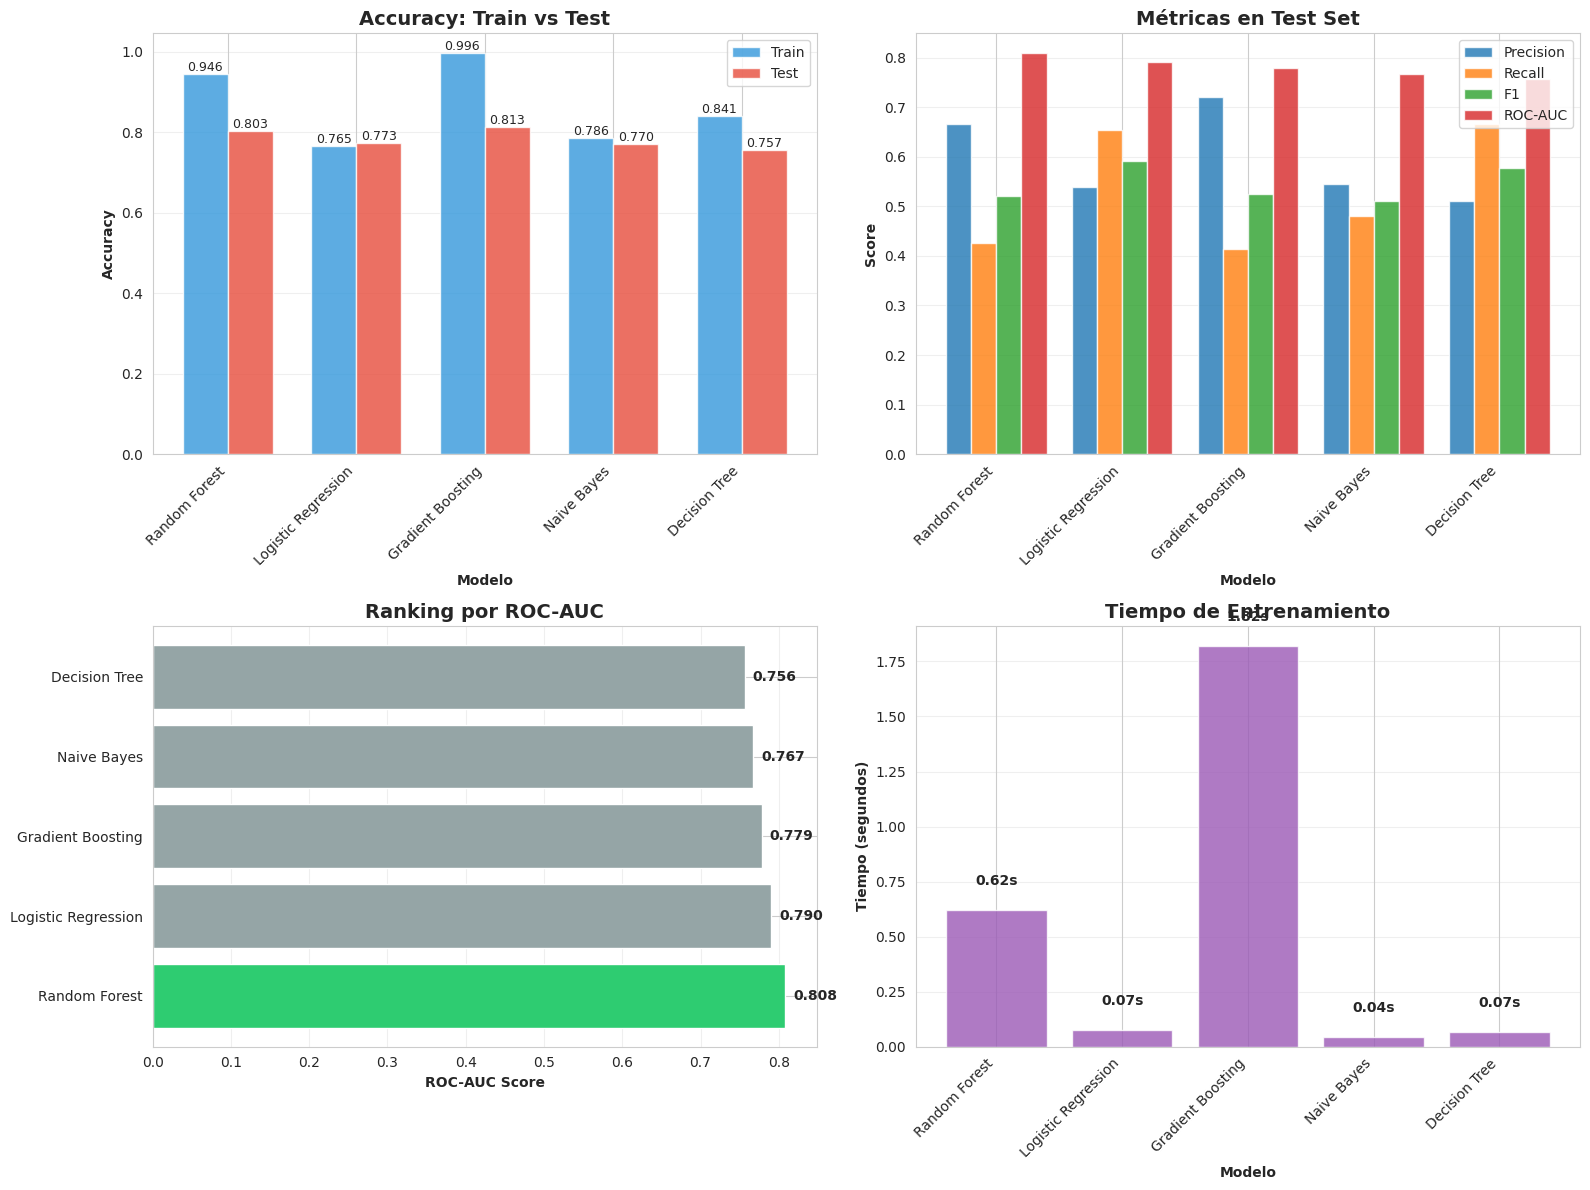

💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/07_comparacion_modelos.png


In [30]:
# ============================================================================
# VISUALIZACIÓN: COMPARACIÓN DE MODELOS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# 1. Comparación de Accuracy
ax = axes[0]
x_pos = np.arange(len(df_comparacion))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_comparacion['Accuracy_Train'],
               width, label='Train', color='#3498db', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_comparacion['Accuracy_Test'],
               width, label='Test', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Modelo', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Accuracy: Train vs Test', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Añadir valores
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Métricas en Test
ax = axes[1]
metricas = ['Precision_Test', 'Recall_Test', 'F1_Test', 'ROC-AUC_Test']
x = np.arange(len(df_comparacion))
width = 0.2

for i, metrica in enumerate(metricas):
    offset = width * (i - 1.5)
    ax.bar(x + offset, df_comparacion[metrica], width,
           label=metrica.replace('_Test', ''), alpha=0.8)

ax.set_xlabel('Modelo', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Métricas en Test Set', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 3. ROC-AUC Ranking
ax = axes[2]
colors = ['#2ecc71' if i == 0 else '#95a5a6' for i in range(len(df_comparacion))]
bars = ax.barh(df_comparacion['Modelo'], df_comparacion['ROC-AUC_Test'], color=colors)
ax.set_xlabel('ROC-AUC Score', fontweight='bold')
ax.set_title('Ranking por ROC-AUC', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (bar, val) in enumerate(zip(bars, df_comparacion['ROC-AUC_Test'])):
    ax.text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold')

# 4. Tiempo de entrenamiento
ax = axes[3]
bars = ax.bar(df_comparacion['Modelo'], df_comparacion['Tiempo (s)'],
              color='#9b59b6', alpha=0.8)
ax.set_xlabel('Modelo', fontweight='bold')
ax.set_ylabel('Tiempo (segundos)', fontweight='bold')
ax.set_title('Tiempo de Entrenamiento', fontsize=14, fontweight='bold')
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Añadir valores
for bar, val in zip(bars, df_comparacion['Tiempo (s)']):
    ax.text(bar.get_x() + bar.get_width()/2., val + 0.1,
           f'{val:.2f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(ruta_outputs + '07_comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {ruta_outputs}07_comparacion_modelos.png")


📈 CURVAS ROC


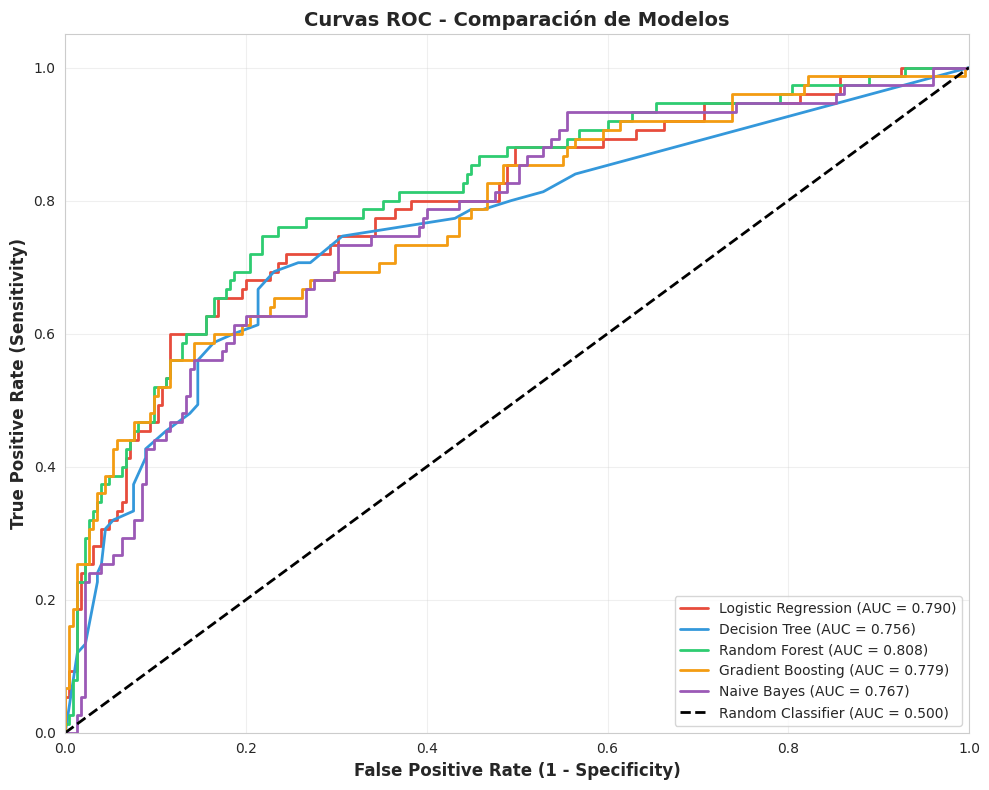

💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/08_curvas_roc.png


In [31]:
# ============================================================================
# CURVAS ROC - COMPARACIÓN
# ============================================================================

print("\n" + "=" * 80)
print("📈 CURVAS ROC")
print("=" * 80)

plt.figure(figsize=(10, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, (nombre, res) in enumerate(resultados.items()):
    fpr, tpr, _ = roc_curve(y_test, res['y_proba_test'])
    auc = res['test']['roc_auc']

    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})',
            color=colors[i], linewidth=2)

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('Curvas ROC - Comparación de Modelos', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(ruta_outputs + '08_curvas_roc.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 Gráfico guardado en: {ruta_outputs}08_curvas_roc.png")


🏆 ANÁLISIS DETALLADO: Random Forest

📊 MATRIZ DE CONFUSIÓN:
[[209  16]
 [ 43  32]]

📈 INTERPRETACIÓN:
   True Negatives (TN):   209 - Activos correctamente identificados
   False Positives (FP):   16 - Activos predichos como Churn (error tipo I)
   False Negatives (FN):   43 - Churn predichos como Activos (error tipo II) ⚠️
   True Positives (TP):    32 - Churn correctamente identificados

📊 MÉTRICAS ADICIONALES:
   Specificity (True Negative Rate): 0.929
   Sensitivity (True Positive Rate): 0.427
   False Positive Rate: 0.071
   False Negative Rate: 0.573


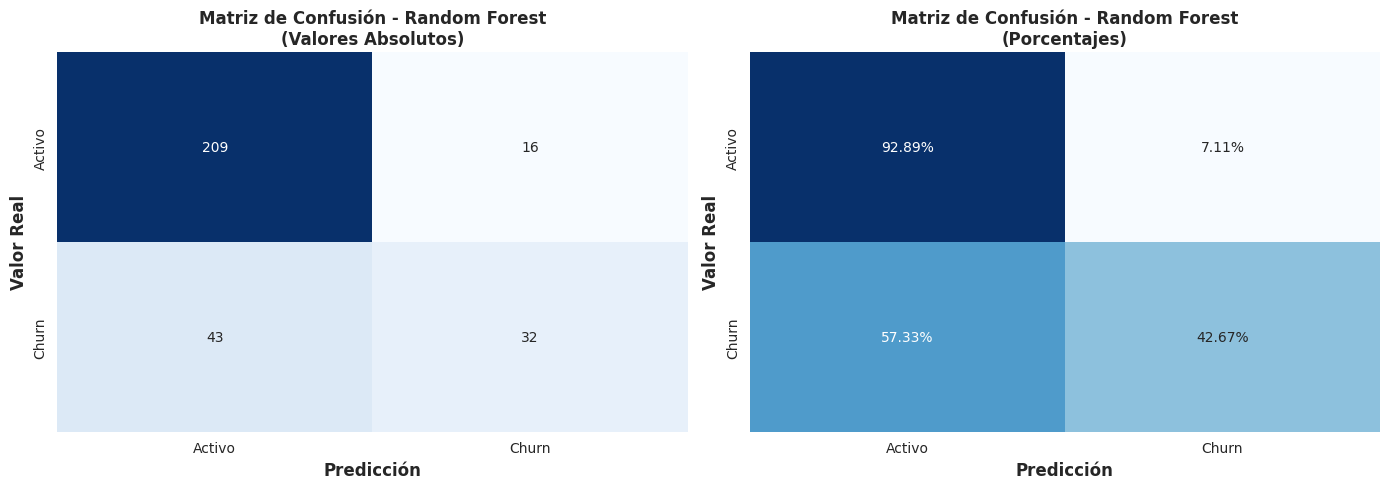


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/09_matriz_confusion_mejor_modelo.png


In [32]:
# ============================================================================
# ANÁLISIS DETALLADO DEL MEJOR MODELO
# ============================================================================

print("\n" + "=" * 80)
print(f"🏆 ANÁLISIS DETALLADO: {mejor_modelo_nombre}")
print("=" * 80)

# Predicciones del mejor modelo
y_pred_mejor = resultados[mejor_modelo_nombre]['y_pred_test']
y_proba_mejor = resultados[mejor_modelo_nombre]['y_proba_test']

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_mejor)

print("\n📊 MATRIZ DE CONFUSIÓN:")
print(cm)

# Calcular métricas desde la matriz
tn, fp, fn, tp = cm.ravel()

print(f"\n📈 INTERPRETACIÓN:")
print(f"   True Negatives (TN):  {tn:4d} - Activos correctamente identificados")
print(f"   False Positives (FP): {fp:4d} - Activos predichos como Churn (error tipo I)")
print(f"   False Negatives (FN): {fn:4d} - Churn predichos como Activos (error tipo II) ⚠️")
print(f"   True Positives (TP):  {tp:4d} - Churn correctamente identificados")

# Calcular tasas
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f"\n📊 MÉTRICAS ADICIONALES:")
print(f"   Specificity (True Negative Rate): {specificity:.3f}")
print(f"   Sensitivity (True Positive Rate): {sensitivity:.3f}")
print(f"   False Positive Rate: {fp/(fp+tn):.3f}")
print(f"   False Negative Rate: {fn/(fn+tp):.3f}")

# Visualización de la matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz en números absolutos
ax = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
           xticklabels=['Activo', 'Churn'],
           yticklabels=['Activo', 'Churn'])
ax.set_ylabel('Valor Real', fontweight='bold', fontsize=12)
ax.set_xlabel('Predicción', fontweight='bold', fontsize=12)
ax.set_title(f'Matriz de Confusión - {mejor_modelo_nombre}\n(Valores Absolutos)',
            fontweight='bold', fontsize=12)

# Matriz en porcentajes
ax = axes[1]
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_pct, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax,
           xticklabels=['Activo', 'Churn'],
           yticklabels=['Activo', 'Churn'])
ax.set_ylabel('Valor Real', fontweight='bold', fontsize=12)
ax.set_xlabel('Predicción', fontweight='bold', fontsize=12)
ax.set_title(f'Matriz de Confusión - {mejor_modelo_nombre}\n(Porcentajes)',
            fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(ruta_outputs + '09_matriz_confusion_mejor_modelo.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}09_matriz_confusion_mejor_modelo.png")

In [33]:
# ============================================================================
# REPORTE DE CLASIFICACIÓN
# ============================================================================

print("\n" + "=" * 80)
print("📋 REPORTE DE CLASIFICACIÓN")
print("=" * 80)

# Reporte detallado
report = classification_report(y_test, y_pred_mejor,
                               target_names=['Activo', 'Churn'],
                               digits=3)
print(report)

# Interpretación del negocio
print("\n💼 IMPACTO EN EL NEGOCIO:")
print(f"\n1. CLIENTES IDENTIFICADOS CORRECTAMENTE PARA RETENCIÓN:")
print(f"   • {tp} clientes con alto riesgo de churn detectados")
print(f"   • Tasa de detección: {sensitivity:.1%}")

print(f"\n2. FALSOS NEGATIVOS (Oportunidad perdida):")
print(f"   • {fn} clientes en riesgo NO detectados")
print(f"   • {fn/(fn+tp):.1%} de los clientes con churn se nos escapan")
print(f"   • ⚠️ Estos clientes se irán sin estrategia de retención")

print(f"\n3. FALSOS POSITIVOS (Recursos mal invertidos):")
print(f"   • {fp} clientes activos marcados como riesgo")
print(f"   • {fp/(fp+tn):.1%} de clientes sanos reciben campaña innecesaria")
print(f"   • 💰 Costo de campaña desperdiciada")

print(f"\n4. BALANCE PRECISION vs RECALL:")
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print(f"   • Precision: {precision:.1%} - De los que marcamos, {precision:.1%} realmente están en riesgo")
print(f"   • Recall: {recall:.1%} - Capturamos {recall:.1%} de todos los que se irán")


📋 REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

      Activo      0.829     0.929     0.876       225
       Churn      0.667     0.427     0.520        75

    accuracy                          0.803       300
   macro avg      0.748     0.678     0.698       300
weighted avg      0.789     0.803     0.787       300


💼 IMPACTO EN EL NEGOCIO:

1. CLIENTES IDENTIFICADOS CORRECTAMENTE PARA RETENCIÓN:
   • 32 clientes con alto riesgo de churn detectados
   • Tasa de detección: 42.7%

2. FALSOS NEGATIVOS (Oportunidad perdida):
   • 43 clientes en riesgo NO detectados
   • 57.3% de los clientes con churn se nos escapan
   • ⚠️ Estos clientes se irán sin estrategia de retención

3. FALSOS POSITIVOS (Recursos mal invertidos):
   • 16 clientes activos marcados como riesgo
   • 7.1% de clientes sanos reciben campaña innecesaria
   • 💰 Costo de campaña desperdiciada

4. BALANCE PRECISION vs RECALL:
   • Precision: 66.7% - De los que marcamos, 66.7% realmente e


⭐ FEATURE IMPORTANCE - VARIABLES MÁS IMPORTANTES

📊 TOP 20 FEATURES MÁS IMPORTANTES:
                       Feature  Importance
         satisfaccion_ajustada    0.110106
         satisfaccion_servicio    0.089594
           num_quejas_reclamos    0.075983
     variacion_facturacion_pct    0.073609
            dias_sin_actividad    0.060630
        prima_mensual_promedio    0.030535
               ratio_actividad    0.030220
tiempo_respuesta_promedio_dias    0.028892
        descuento_aplicado_pct    0.027801
                      inactivo    0.027254
      valor_mercancia_promedio    0.026706
           prima_total_12meses    0.025651
            dias_mora_promedio    0.024122
          num_envios_trimestre    0.023795
              antiguedad_meses    0.023226
              engagement_score    0.020712
               es_problematico    0.020161
     emails_abiertos_trimestre    0.020059
              ratio_siniestros    0.019424
                    loss_ratio    0.019141

💡 INSIGHT:

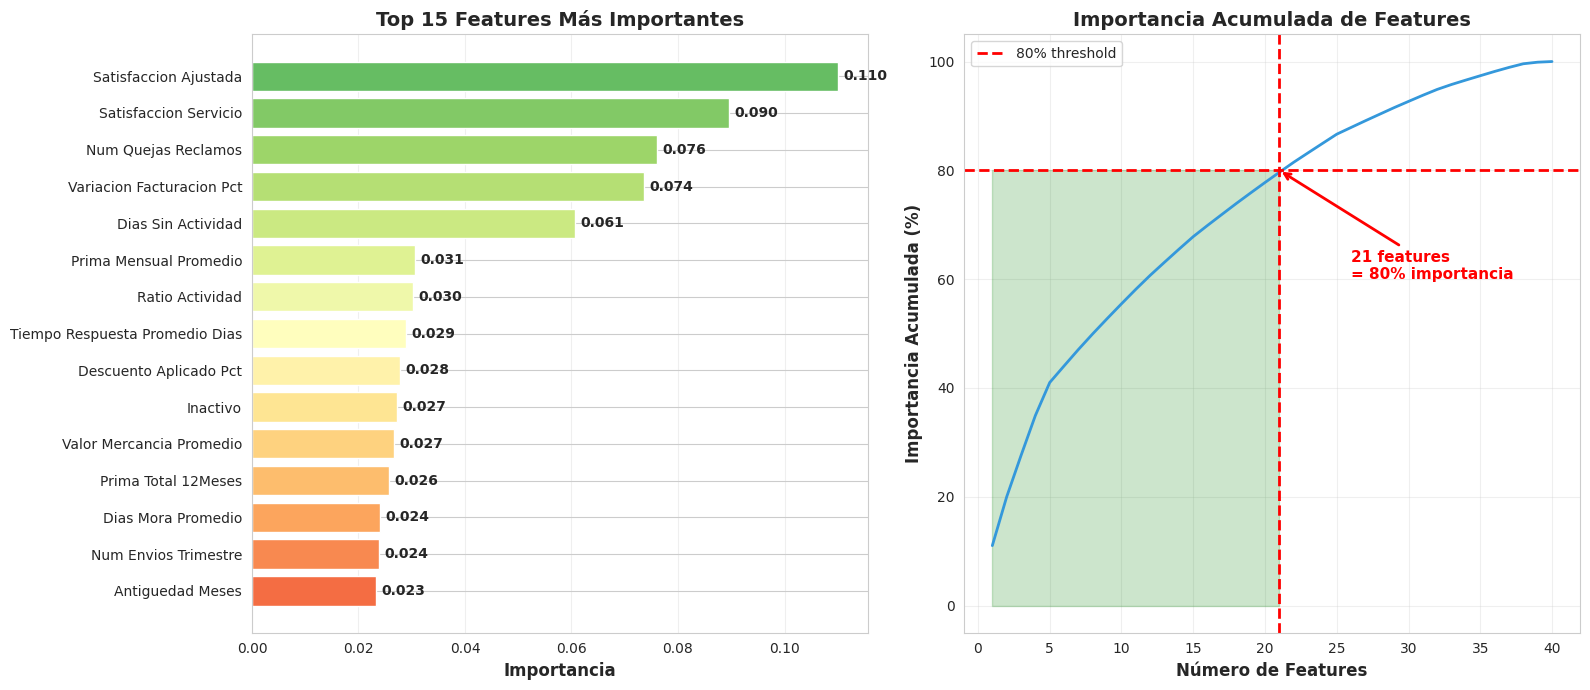


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/10_feature_importance.png


In [34]:
# ============================================================================
# FEATURE IMPORTANCE - RANDOM FOREST
# ============================================================================

print("\n" + "=" * 80)
print("⭐ FEATURE IMPORTANCE - VARIABLES MÁS IMPORTANTES")
print("=" * 80)

# Obtener importancias
feature_importance = mejor_modelo.feature_importances_
feature_names = X_train.columns

# Crear DataFrame
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Top 20
top_20 = df_importance.head(20)

print("\n📊 TOP 20 FEATURES MÁS IMPORTANTES:")
print(top_20.to_string(index=False))

# Calcular importancia acumulada
df_importance['Cumulative'] = df_importance['Importance'].cumsum()
features_80pct = len(df_importance[df_importance['Cumulative'] <= 0.80])

print(f"\n💡 INSIGHT:")
print(f"   • Las top {features_80pct} features explican el 80% de la predicción")
print(f"   • Feature más importante: {df_importance.iloc[0]['Feature']} ({df_importance.iloc[0]['Importance']:.3f})")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Top 15 features
ax = axes[0]
top_15 = df_importance.head(15)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_15)))

bars = ax.barh(range(len(top_15)), top_15['Importance'], color=colors)
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels([f.replace('_', ' ').title() for f in top_15['Feature']])
ax.set_xlabel('Importancia', fontweight='bold', fontsize=12)
ax.set_title('Top 15 Features Más Importantes', fontweight='bold', fontsize=14)
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (bar, val) in enumerate(zip(bars, top_15['Importance'])):
    ax.text(val + 0.001, i, f'{val:.3f}', va='center', fontweight='bold')

# Invertir eje Y para que el más importante esté arriba
ax.invert_yaxis()

# Gráfico 2: Importancia acumulada
ax = axes[1]
ax.plot(range(1, len(df_importance)+1),
       df_importance['Cumulative'] * 100,
       linewidth=2, color='#3498db')
ax.axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% threshold')
ax.axvline(x=features_80pct, color='red', linestyle='--', linewidth=2)
ax.fill_between(range(1, features_80pct+1), 0, 80, alpha=0.2, color='green')
ax.set_xlabel('Número de Features', fontweight='bold', fontsize=12)
ax.set_ylabel('Importancia Acumulada (%)', fontweight='bold', fontsize=12)
ax.set_title('Importancia Acumulada de Features', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(alpha=0.3)

# Anotación
ax.annotate(f'{features_80pct} features\n= 80% importancia',
           xy=(features_80pct, 80), xytext=(features_80pct+5, 60),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig(ruta_outputs + '10_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}10_feature_importance.png")


🎯 OPTIMIZACIÓN DEL THRESHOLD PARA MEJORAR RECALL

📊 ANÁLISIS DE THRESHOLDS:
 Threshold  Precision  Recall  F1-Score
      0.10      0.263   1.000     0.417
      0.15      0.293   0.947     0.448
      0.20      0.345   0.907     0.500
      0.25      0.399   0.813     0.535
      0.30      0.487   0.773     0.598
      0.35      0.535   0.707     0.609
      0.40      0.592   0.600     0.596
      0.45      0.614   0.467     0.530
      0.50      0.667   0.427     0.520
      0.55      0.690   0.387     0.496
      0.60      0.737   0.373     0.496
      0.65      0.743   0.347     0.473
      0.70      0.781   0.333     0.467
      0.75      0.773   0.227     0.351
      0.80      0.750   0.120     0.207
      0.85      0.500   0.013     0.026
      0.90      0.000   0.000     0.000

🎯 THRESHOLD ÓPTIMO PARA RECALL:
   Threshold: 0.10
   Precision: 0.263
   Recall: 1.000
   F1-Score: 0.417

📊 COMPARACIÓN CON THRESHOLD DEFAULT (~0.5):
   Threshold usado: 0.50
   Precision: 0.667
   Re

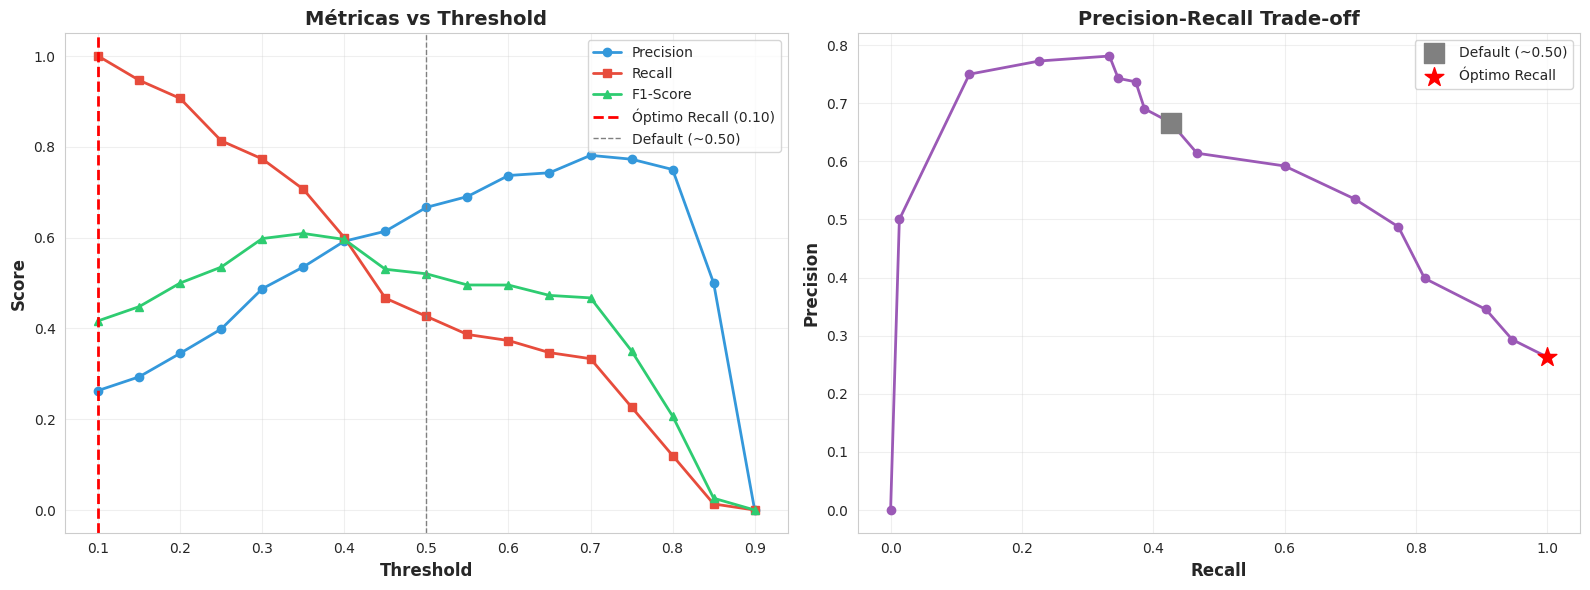


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/11_threshold_optimization.png

💡 RECOMENDACIÓN DE NEGOCIO:
   ✅ USAR THRESHOLD 0.10
   • Detectarás 100.0% de los clientes en riesgo
   • Mejora de 57.3% en detección vs default
   • 26.3% de tus alertas serán correctas

   💰 Impacto: Capturar ~42 clientes adicionales


In [35]:
# ============================================================================
# OPTIMIZACIÓN DEL THRESHOLD - MEJORAR RECALL
# ============================================================================

print("\n" + "=" * 80)
print("🎯 OPTIMIZACIÓN DEL THRESHOLD PARA MEJORAR RECALL")
print("=" * 80)

# Probar diferentes thresholds
thresholds = np.arange(0.1, 0.91, 0.05)
resultados_threshold = []

for threshold in thresholds:
    y_pred_threshold = (y_proba_mejor >= threshold).astype(int)

    # Calcular métricas solo si hay predicciones positivas
    if y_pred_threshold.sum() > 0:
        precision = precision_score(y_test, y_pred_threshold, zero_division=0)
        recall = recall_score(y_test, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_test, y_pred_threshold, zero_division=0)
    else:
        precision = recall = f1 = 0

    resultados_threshold.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

df_threshold = pd.DataFrame(resultados_threshold)

print("\n📊 ANÁLISIS DE THRESHOLDS:")
print(df_threshold.round(3).to_string(index=False))

# Encontrar threshold óptimo por recall
mejor_recall_idx = df_threshold['Recall'].idxmax()
threshold_optimo_recall = df_threshold.iloc[mejor_recall_idx]

print(f"\n🎯 THRESHOLD ÓPTIMO PARA RECALL:")
print(f"   Threshold: {threshold_optimo_recall['Threshold']:.2f}")
print(f"   Precision: {threshold_optimo_recall['Precision']:.3f}")
print(f"   Recall: {threshold_optimo_recall['Recall']:.3f}")
print(f"   F1-Score: {threshold_optimo_recall['F1-Score']:.3f}")

# Threshold por defecto (0.5) - buscar el más cercano
threshold_default = df_threshold.iloc[(df_threshold['Threshold'] - 0.5).abs().argsort()[0]]

print(f"\n📊 COMPARACIÓN CON THRESHOLD DEFAULT (~0.5):")
print(f"   Threshold usado: {threshold_default['Threshold']:.2f}")
print(f"   Precision: {threshold_default['Precision']:.3f}")
print(f"   Recall: {threshold_default['Recall']:.3f}")
print(f"   F1-Score: {threshold_default['F1-Score']:.3f}")

print(f"\n📈 MEJORA AL OPTIMIZAR:")
print(f"   Recall: {threshold_default['Recall']:.3f} → {threshold_optimo_recall['Recall']:.3f} (+{threshold_optimo_recall['Recall'] - threshold_default['Recall']:.3f})")
print(f"   Precision: {threshold_default['Precision']:.3f} → {threshold_optimo_recall['Precision']:.3f} ({threshold_optimo_recall['Precision'] - threshold_default['Precision']:+.3f})")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Métricas vs Threshold
ax = axes[0]
ax.plot(df_threshold['Threshold'], df_threshold['Precision'],
       'o-', linewidth=2, label='Precision', color='#3498db')
ax.plot(df_threshold['Threshold'], df_threshold['Recall'],
       's-', linewidth=2, label='Recall', color='#e74c3c')
ax.plot(df_threshold['Threshold'], df_threshold['F1-Score'],
       '^-', linewidth=2, label='F1-Score', color='#2ecc71')

ax.axvline(x=threshold_optimo_recall['Threshold'], color='red',
          linestyle='--', linewidth=2, label=f'Óptimo Recall ({threshold_optimo_recall["Threshold"]:.2f})')
ax.axvline(x=threshold_default['Threshold'], color='gray',
          linestyle='--', linewidth=1, label=f'Default (~{threshold_default["Threshold"]:.2f})')

ax.set_xlabel('Threshold', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Métricas vs Threshold', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(alpha=0.3)

# Gráfico 2: Precision-Recall Trade-off
ax = axes[1]
ax.plot(df_threshold['Recall'], df_threshold['Precision'],
       'o-', linewidth=2, color='#9b59b6')

# Marcar puntos importantes
ax.scatter([threshold_default['Recall']], [threshold_default['Precision']],
          s=200, color='gray', marker='s', label=f'Default (~{threshold_default["Threshold"]:.2f})', zorder=5)
ax.scatter([threshold_optimo_recall['Recall']], [threshold_optimo_recall['Precision']],
          s=200, color='red', marker='*', label='Óptimo Recall', zorder=5)

ax.set_xlabel('Recall', fontweight='bold', fontsize=12)
ax.set_ylabel('Precision', fontweight='bold', fontsize=12)
ax.set_title('Precision-Recall Trade-off', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(ruta_outputs + '11_threshold_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}11_threshold_optimization.png")

# Recomendación de negocio
print(f"\n💡 RECOMENDACIÓN DE NEGOCIO:")
mejora_recall = threshold_optimo_recall['Recall'] - threshold_default['Recall']

if mejora_recall > 0.15:
    print(f"   ✅ USAR THRESHOLD {threshold_optimo_recall['Threshold']:.2f}")
    print(f"   • Detectarás {threshold_optimo_recall['Recall']:.1%} de los clientes en riesgo")
    print(f"   • Mejora de {mejora_recall:.1%} en detección vs default")
    print(f"   • {threshold_optimo_recall['Precision']:.1%} de tus alertas serán correctas")
    print(f"\n   💰 Impacto: Capturar ~{int(75 * mejora_recall)} clientes adicionales")
elif mejora_recall > 0.05:
    print(f"   ⚡ MEJORA MODERADA con threshold {threshold_optimo_recall['Threshold']:.2f}")
    print(f"   • +{mejora_recall:.1%} en detección de churn")
else:
    print(f"   ⚠️ Modelo con limitaciones en recall")
    print(f"   • Considera reentrenar con más features o datos")
    print(f"   • Threshold actual ya es óptimo")

In [36]:
# ============================================================================
# GUARDAR MODELO FINAL
# ============================================================================

print("\n" + "=" * 80)
print("💾 GUARDANDO MODELO FINAL")
print("=" * 80)

# Guardar el mejor modelo
with open(ruta_models + 'modelo_churn_final.pkl', 'wb') as f:
    pickle.dump(mejor_modelo, f)

print(f"✅ Modelo guardado: models/modelo_churn_final.pkl")
print(f"   Algoritmo: {mejor_modelo_nombre}")
print(f"   ROC-AUC: {resultados[mejor_modelo_nombre]['test']['roc_auc']:.3f}")

# Guardar threshold óptimo
threshold_config = {
    'threshold_default': 0.5,
    'threshold_optimo_recall': threshold_optimo_recall['Threshold'],
    'metricas_default': threshold_default.to_dict(),
    'metricas_optimo': threshold_optimo_recall.to_dict()
}

with open(ruta_models + 'threshold_config.pkl', 'wb') as f:
    pickle.dump(threshold_config, f)

print(f"✅ Configuración de threshold guardada")

# Guardar resultados completos
with open(ruta_models + 'resultados_modelos.pkl', 'wb') as f:
    pickle.dump(resultados, f)

print(f"✅ Resultados de todos los modelos guardados")

# Guardar comparación en CSV
df_comparacion.to_csv(ruta_outputs + 'comparacion_modelos.csv', index=False)
print(f"✅ Comparación exportada a CSV")

# Guardar feature importance
df_importance.to_csv(ruta_outputs + 'feature_importance.csv', index=False)
print(f"✅ Feature importance exportada a CSV")

print(f"\n📁 ARCHIVOS GENERADOS:")
print(f"   ✓ models/modelo_churn_final.pkl")
print(f"   ✓ models/threshold_config.pkl")
print(f"   ✓ models/resultados_modelos.pkl")
print(f"   ✓ outputs/comparacion_modelos.csv")
print(f"   ✓ outputs/feature_importance.csv")


💾 GUARDANDO MODELO FINAL
✅ Modelo guardado: models/modelo_churn_final.pkl
   Algoritmo: Random Forest
   ROC-AUC: 0.808
✅ Configuración de threshold guardada
✅ Resultados de todos los modelos guardados
✅ Comparación exportada a CSV
✅ Feature importance exportada a CSV

📁 ARCHIVOS GENERADOS:
   ✓ models/modelo_churn_final.pkl
   ✓ models/threshold_config.pkl
   ✓ models/resultados_modelos.pkl
   ✓ outputs/comparacion_modelos.csv
   ✓ outputs/feature_importance.csv


Cargar datos del modelo y aplicarlo a los clientes activos


In [37]:
# ============================================================================
# NOTEBOOK 4: PREDICCIONES SOBRE CLIENTES ACTIVOS
# ============================================================================

print("=" * 80)
print("🔮 PREDICCIONES DE CHURN - CLIENTES ACTIVOS 2025")
print("=" * 80)

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas
ruta_base = '/content/drive/MyDrive/dbs portfolio/Churn Model/'
ruta_outputs = ruta_base + 'outputs/'
ruta_models = ruta_base + 'models/'

print("\n📂 Cargando modelo y configuración...")

# Cargar modelo entrenado
with open(ruta_models + 'modelo_churn_final.pkl', 'rb') as f:
    modelo = pickle.load(f)

# Cargar encoders
with open(ruta_models + 'label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# Cargar scaler
with open(ruta_models + 'scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Cargar features
with open(ruta_models + 'features.pkl', 'rb') as f:
    features_finales = pickle.load(f)

# Cargar threshold config
with open(ruta_models + 'threshold_config.pkl', 'rb') as f:
    threshold_config = pickle.load(f)

print("✅ Modelo y configuración cargados")
print(f"   Modelo: Random Forest")
print(f"   Features: {len(features_finales)}")
print(f"   Threshold óptimo: {threshold_config['threshold_optimo_recall']:.2f}")

# Cargar datos de clientes activos
df_activos = pd.read_csv(ruta_base + 'seguros_activos.csv')

print(f"\n📊 Clientes activos cargados: {len(df_activos):,} registros")
print(f"   Columnas: {len(df_activos.columns)}")

🔮 PREDICCIONES DE CHURN - CLIENTES ACTIVOS 2025

📂 Cargando modelo y configuración...
✅ Modelo y configuración cargados
   Modelo: Random Forest
   Features: 40
   Threshold óptimo: 0.10

📊 Clientes activos cargados: 400 registros
   Columnas: 33


In [38]:
# ============================================================================
# PREPROCESAR CLIENTES ACTIVOS (mismo proceso que el entrenamiento)
# ============================================================================

print("\n" + "=" * 80)
print("🔧 PREPROCESANDO CLIENTES ACTIVOS")
print("=" * 80)

# Guardar IDs para el reporte final
clientes_ids = df_activos['cliente_id'].copy()

# Crear copia para procesar
df_activos_prep = df_activos.copy()

print("✓ Paso 1: Feature Engineering...")

# Aplicar EXACTAMENTE las mismas transformaciones que en entrenamiento

# 1. Features temporales
if 'fecha_primera_poliza' in df_activos_prep.columns:
    df_activos_prep['fecha_primera_poliza'] = pd.to_datetime(df_activos_prep['fecha_primera_poliza'])
    df_activos_prep['ano_inicio'] = df_activos_prep['fecha_primera_poliza'].dt.year
    df_activos_prep['mes_inicio'] = df_activos_prep['fecha_primera_poliza'].dt.month

# 2. Ratio de actividad
if 'num_envios_ultimo_mes' in df_activos_prep.columns and 'antiguedad_meses' in df_activos_prep.columns:
    df_activos_prep['ratio_actividad'] = df_activos_prep['num_envios_ultimo_mes'] / (df_activos_prep['antiguedad_meses'] + 1)

# 3. Cliente de alto valor
if 'prima_mensual_promedio' in df_activos_prep.columns:
    umbral_alto_valor = df_activos_prep['prima_mensual_promedio'].quantile(0.75)
    df_activos_prep['es_alto_valor'] = (df_activos_prep['prima_mensual_promedio'] > umbral_alto_valor).astype(int)

# 4. Cliente problemático
if 'num_quejas_reclamos' in df_activos_prep.columns and 'num_siniestros_12meses' in df_activos_prep.columns:
    df_activos_prep['es_problematico'] = (
        (df_activos_prep['num_quejas_reclamos'] >= 3) |
        (df_activos_prep['num_siniestros_12meses'] >= 4)
    ).astype(int)

# 5. Indicador de inactividad
if 'dias_sin_actividad' in df_activos_prep.columns:
    df_activos_prep['inactivo'] = (df_activos_prep['dias_sin_actividad'] > 60).astype(int)

# 6. Score de satisfacción ajustado
if 'satisfaccion_servicio' in df_activos_prep.columns and 'num_quejas_reclamos' in df_activos_prep.columns:
    df_activos_prep['satisfaccion_ajustada'] = df_activos_prep['satisfaccion_servicio'] - (df_activos_prep['num_quejas_reclamos'] * 0.5)
    df_activos_prep['satisfaccion_ajustada'] = df_activos_prep['satisfaccion_ajustada'].clip(lower=1, upper=5)

# 7. Tendencia de facturación
if 'variacion_facturacion_pct' in df_activos_prep.columns:
    df_activos_prep['tendencia_negativa'] = (df_activos_prep['variacion_facturacion_pct'] < -20).astype(int)

# 8. Engagement score
if all(col in df_activos_prep.columns for col in ['llamadas_comercial_trimestre', 'emails_abiertos_trimestre']):
    df_activos_prep['engagement_score'] = (
        df_activos_prep['llamadas_comercial_trimestre'] * 2 +
        df_activos_prep['emails_abiertos_trimestre']
    )

# 9. Ratio de siniestralidad
if 'num_siniestros_12meses' in df_activos_prep.columns and 'num_envios_trimestre' in df_activos_prep.columns:
    df_activos_prep['ratio_siniestros'] = df_activos_prep['num_siniestros_12meses'] / (df_activos_prep['num_envios_trimestre'] * 4 + 1)

# 10. Categoría de antigüedad
if 'antiguedad_meses' in df_activos_prep.columns:
    df_activos_prep['categoria_antiguedad'] = pd.cut(
        df_activos_prep['antiguedad_meses'],
        bins=[0, 6, 12, 24, 48, 999],
        labels=['Muy_Nuevo', 'Nuevo', 'Establecido', 'Maduro', 'Veterano']
    )

print("✓ Paso 2: Codificación de variables categóricas...")

# Identificar variables categóricas
categoricas = df_activos_prep.select_dtypes(include=['object', 'category']).columns.tolist()
categoricas = [col for col in categoricas if col not in ['cliente_id', 'nombre_comercial']]

# Aplicar Label Encoding con los encoders entrenados
for col in categoricas:
    if col in label_encoders:
        le = label_encoders[col]
        # Manejar categorías nuevas
        df_activos_prep[col] = df_activos_prep[col].astype(str).apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )
    else:
        print(f"   ⚠️ Columna '{col}' no encontrada en encoders, se eliminará")

print("✓ Paso 3: Seleccionar features...")

# Asegurar que tenemos todas las features necesarias
missing_features = [f for f in features_finales if f not in df_activos_prep.columns]
if missing_features:
    print(f"   ⚠️ Features faltantes: {missing_features}")
    # Crear con valor 0
    for feat in missing_features:
        df_activos_prep[feat] = 0

# Seleccionar solo las features del modelo
X_activos = df_activos_prep[features_finales]

print("✓ Paso 4: Escalado de variables numéricas...")

# Identificar columnas numéricas a escalar
num_cols_to_scale = []
for col in X_activos.columns:
    if X_activos[col].dtype in ['int64', 'float64']:
        if X_activos[col].nunique() > 2:
            num_cols_to_scale.append(col)

# Aplicar el scaler entrenado
X_activos_scaled = X_activos.copy()
X_activos_scaled[num_cols_to_scale] = scaler.transform(X_activos[num_cols_to_scale])

print(f"\n✅ Preprocesamiento completado")
print(f"   Registros: {len(X_activos_scaled):,}")
print(f"   Features: {len(X_activos_scaled.columns)}")
print(f"   Valores nulos: {X_activos_scaled.isnull().sum().sum()}")


🔧 PREPROCESANDO CLIENTES ACTIVOS
✓ Paso 1: Feature Engineering...
✓ Paso 2: Codificación de variables categóricas...
✓ Paso 3: Seleccionar features...
✓ Paso 4: Escalado de variables numéricas...

✅ Preprocesamiento completado
   Registros: 400
   Features: 40
   Valores nulos: 0


In [39]:
# ============================================================================
# GENERAR PREDICCIONES DE CHURN
# ============================================================================

print("\n" + "=" * 80)
print("🔮 GENERANDO PREDICCIONES")
print("=" * 80)

# Predecir probabilidades
probabilidades_churn = modelo.predict_proba(X_activos_scaled)[:, 1]

# Usar threshold óptimo
threshold_optimo = threshold_config['threshold_optimo_recall']
predicciones_optimo = (probabilidades_churn >= threshold_optimo).astype(int)

# También usar threshold default para comparar
predicciones_default = (probabilidades_churn >= 0.5).astype(int)

print(f"✅ Predicciones generadas para {len(probabilidades_churn):,} clientes")

print(f"\n📊 RESULTADOS CON THRESHOLD ÓPTIMO ({threshold_optimo:.2f}):")
print(f"   Clientes de ALTO RIESGO: {predicciones_optimo.sum():,} ({predicciones_optimo.sum()/len(predicciones_optimo)*100:.1f}%)")
print(f"   Clientes de BAJO RIESGO: {(predicciones_optimo == 0).sum():,} ({(predicciones_optimo == 0).sum()/len(predicciones_optimo)*100:.1f}%)")

print(f"\n📊 RESULTADOS CON THRESHOLD DEFAULT (0.50):")
print(f"   Clientes de ALTO RIESGO: {predicciones_default.sum():,} ({predicciones_default.sum()/len(predicciones_default)*100:.1f}%)")
print(f"   Clientes de BAJO RIESGO: {(predicciones_default == 0).sum():,} ({(predicciones_default == 0).sum()/len(predicciones_default)*100:.1f}%)")

# Crear DataFrame con resultados
df_predicciones = pd.DataFrame({
    'cliente_id': clientes_ids,
    'probabilidad_churn': probabilidades_churn,
    'riesgo_optimo': predicciones_optimo,
    'riesgo_default': predicciones_default
})

# Categorizar por nivel de riesgo
def categorizar_riesgo(prob):
    if prob >= 0.7:
        return 'Crítico'
    elif prob >= 0.5:
        return 'Alto'
    elif prob >= 0.3:
        return 'Medio'
    else:
        return 'Bajo'

df_predicciones['nivel_riesgo'] = df_predicciones['probabilidad_churn'].apply(categorizar_riesgo)

# Estadísticas por nivel
print(f"\n📊 DISTRIBUCIÓN POR NIVEL DE RIESGO:")
dist_riesgo = df_predicciones['nivel_riesgo'].value_counts()
for nivel in ['Crítico', 'Alto', 'Medio', 'Bajo']:
    if nivel in dist_riesgo.index:
        count = dist_riesgo[nivel]
        pct = count / len(df_predicciones) * 100
        print(f"   {nivel:10s}: {count:3d} clientes ({pct:5.1f}%)")


🔮 GENERANDO PREDICCIONES
✅ Predicciones generadas para 400 clientes

📊 RESULTADOS CON THRESHOLD ÓPTIMO (0.10):
   Clientes de ALTO RIESGO: 393 (98.2%)
   Clientes de BAJO RIESGO: 7 (1.8%)

📊 RESULTADOS CON THRESHOLD DEFAULT (0.50):
   Clientes de ALTO RIESGO: 183 (45.8%)
   Clientes de BAJO RIESGO: 217 (54.2%)

📊 DISTRIBUCIÓN POR NIVEL DE RIESGO:
   Crítico   : 125 clientes ( 31.2%)
   Alto      :  58 clientes ( 14.5%)
   Medio     :  90 clientes ( 22.5%)
   Bajo      : 127 clientes ( 31.8%)


In [40]:
# ============================================================================
# CREAR REPORTE COMPLETO CON DATOS DE CLIENTES
# ============================================================================

print("\n" + "=" * 80)
print("📋 CREANDO REPORTE COMPLETO DE PREDICCIONES")
print("=" * 80)

# Unir predicciones con datos originales
df_reporte = df_activos.merge(df_predicciones, on='cliente_id', how='left')

# Seleccionar columnas relevantes para el reporte
columnas_reporte = [
    'cliente_id',
    'tipo_cliente',
    'sector_industria',
    'antiguedad_meses',
    'prima_mensual_promedio',
    'num_envios_ultimo_mes',
    'dias_sin_actividad',
    'satisfaccion_servicio',
    'num_quejas_reclamos',
    'loss_ratio',
    'tiene_contrato_anual',
    'probabilidad_churn',
    'nivel_riesgo'
]

# Verificar que todas las columnas existan
columnas_reporte = [col for col in columnas_reporte if col in df_reporte.columns]

df_reporte_final = df_reporte[columnas_reporte].copy()

# Ordenar por probabilidad de churn (mayor riesgo primero)
df_reporte_final = df_reporte_final.sort_values('probabilidad_churn', ascending=False)

print(f"✅ Reporte completo generado: {len(df_reporte_final):,} clientes")

# Mostrar top 10 clientes de mayor riesgo
print(f"\n🚨 TOP 10 CLIENTES DE MAYOR RIESGO:")
print(df_reporte_final.head(10).to_string(index=False))

# Estadísticas por segmento
print(f"\n📊 ANÁLISIS POR TIPO DE CLIENTE:")
analisis_tipo = df_reporte_final.groupby('tipo_cliente').agg({
    'probabilidad_churn': 'mean',
    'cliente_id': 'count'
}).round(3)
analisis_tipo.columns = ['Prob_Churn_Promedio', 'Num_Clientes']
analisis_tipo = analisis_tipo.sort_values('Prob_Churn_Promedio', ascending=False)
print(analisis_tipo)

# Clientes críticos por sector
print(f"\n🔥 CLIENTES CRÍTICOS POR SECTOR:")
criticos = df_reporte_final[df_reporte_final['nivel_riesgo'] == 'Crítico']
dist_sector = criticos['sector_industria'].value_counts()
print(dist_sector)


📋 CREANDO REPORTE COMPLETO DE PREDICCIONES
✅ Reporte completo generado: 400 clientes

🚨 TOP 10 CLIENTES DE MAYOR RIESGO:
  cliente_id    tipo_cliente sector_industria  antiguedad_meses  prima_mensual_promedio  num_envios_ultimo_mes  dias_sin_actividad  satisfaccion_servicio  num_quejas_reclamos  loss_ratio  tiene_contrato_anual  probabilidad_churn nivel_riesgo
CLI_ACT_0386  Empresa Grande          Quimico                13              7082013.00                     12                  67                      2                    6       27.54                  True            0.893814      Crítico
CLI_ACT_0145  Empresa Grande       Tecnologia                12              3950978.21                     14                 109                      1                    4        2.22                 False            0.891176      Crítico
CLI_ACT_0126  Empresa Grande      Manufactura                24             10264297.00                     13                  79                      

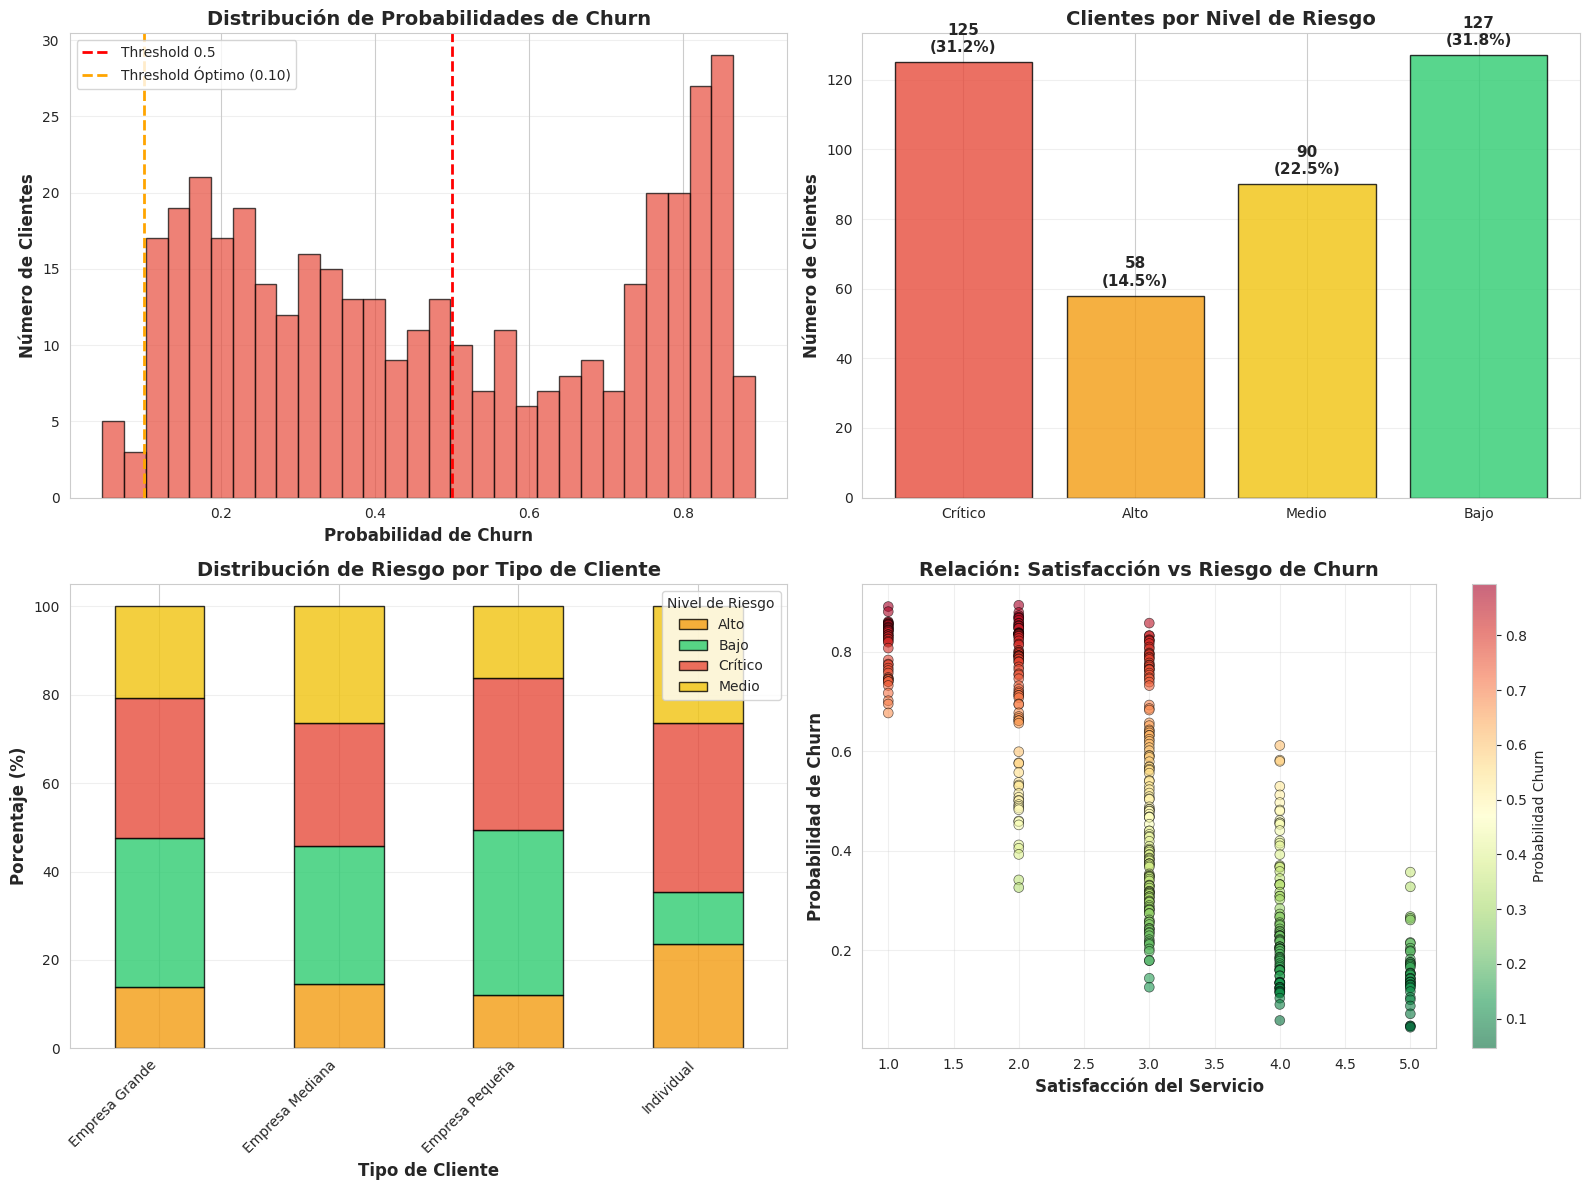


💾 Gráfico guardado en: /content/drive/MyDrive/dbs portfolio/Churn Model/outputs/12_analisis_predicciones.png


In [41]:
# ============================================================================
# VISUALIZACIONES DEL ANÁLISIS DE RIESGO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# 1. Distribución de probabilidades
ax = axes[0]
ax.hist(df_predicciones['probabilidad_churn'], bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold 0.5')
ax.axvline(x=threshold_optimo, color='orange', linestyle='--', linewidth=2,
          label=f'Threshold Óptimo ({threshold_optimo:.2f})')
ax.set_xlabel('Probabilidad de Churn', fontweight='bold', fontsize=12)
ax.set_ylabel('Número de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Distribución de Probabilidades de Churn', fontweight='bold', fontsize=14)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 2. Distribución por nivel de riesgo
ax = axes[1]
colors_riesgo = {'Crítico': '#e74c3c', 'Alto': '#f39c12', 'Medio': '#f1c40f', 'Bajo': '#2ecc71'}
niveles = ['Crítico', 'Alto', 'Medio', 'Bajo']
valores = [dist_riesgo.get(n, 0) for n in niveles]
colors = [colors_riesgo[n] for n in niveles]

bars = ax.bar(niveles, valores, color=colors, alpha=0.8, edgecolor='black')
ax.set_ylabel('Número de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Clientes por Nivel de Riesgo', fontweight='bold', fontsize=14)
ax.grid(axis='y', alpha=0.3)

# Añadir valores y porcentajes
for bar, val in zip(bars, valores):
    height = bar.get_height()
    pct = val / len(df_predicciones) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
           f'{val}\n({pct:.1f}%)', ha='center', va='bottom',
           fontweight='bold', fontsize=11)

# 3. Riesgo por tipo de cliente
ax = axes[2]
tipo_riesgo = df_reporte_final.groupby(['tipo_cliente', 'nivel_riesgo']).size().unstack(fill_value=0)
tipo_riesgo_pct = tipo_riesgo.div(tipo_riesgo.sum(axis=1), axis=0) * 100

tipo_riesgo_pct.plot(kind='bar', stacked=True, ax=ax,
                     color=[colors_riesgo.get(x, 'gray') for x in tipo_riesgo_pct.columns],
                     alpha=0.8, edgecolor='black')
ax.set_xlabel('Tipo de Cliente', fontweight='bold', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontweight='bold', fontsize=12)
ax.set_title('Distribución de Riesgo por Tipo de Cliente', fontweight='bold', fontsize=14)
ax.legend(title='Nivel de Riesgo', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# 4. Probabilidad vs Satisfacción
ax = axes[3]
scatter = ax.scatter(df_reporte_final['satisfaccion_servicio'],
                    df_reporte_final['probabilidad_churn'],
                    c=df_reporte_final['probabilidad_churn'],
                    cmap='RdYlGn_r', s=50, alpha=0.6, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Satisfacción del Servicio', fontweight='bold', fontsize=12)
ax.set_ylabel('Probabilidad de Churn', fontweight='bold', fontsize=12)
ax.set_title('Relación: Satisfacción vs Riesgo de Churn', fontweight='bold', fontsize=14)
plt.colorbar(scatter, ax=ax, label='Probabilidad Churn')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(ruta_outputs + '12_analisis_predicciones.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Gráfico guardado en: {ruta_outputs}12_analisis_predicciones.png")

In [42]:
# ============================================================================
# LISTA DE ACCIÓN: CLIENTES PRIORITARIOS PARA RETENCIÓN
# ============================================================================

print("\n" + "=" * 80)
print("🎯 LISTA DE ACCIÓN - ESTRATEGIA DE RETENCIÓN")
print("=" * 80)

# Filtrar clientes críticos y altos
clientes_accion = df_reporte_final[
    df_reporte_final['nivel_riesgo'].isin(['Crítico', 'Alto'])
].copy()

print(f"\n📋 CLIENTES PARA ACCIÓN INMEDIATA: {len(clientes_accion):,}")

# Añadir recomendación de acción
def recomendar_accion(row):
    if row['probabilidad_churn'] >= 0.8:
        return 'Llamada urgente del gerente + descuento especial'
    elif row['probabilidad_churn'] >= 0.7:
        return 'Llamada del ejecutivo + revisión de contrato'
    elif row['probabilidad_churn'] >= 0.6:
        return 'Contacto proactivo + encuesta de satisfacción'
    elif row['probabilidad_churn'] >= 0.5:
        return 'Email personalizado + beneficio adicional'
    else:
        return 'Monitoreo continuo'

clientes_accion['accion_recomendada'] = clientes_accion.apply(recomendar_accion, axis=1)

# Calcular mediana ANTES de usar en lambda
mediana_prima = clientes_accion['prima_mensual_promedio'].median()

# Priorizar por valor (corregido)
def asignar_prioridad(row):
    prob_alta = row['probabilidad_churn'] >= 0.7
    valor_alto = row['prima_mensual_promedio'] > mediana_prima

    if prob_alta and valor_alto:
        return 1  # Máxima prioridad: alto riesgo + alto valor
    elif prob_alta:
        return 2  # Alto riesgo, valor normal
    elif valor_alto:
        return 3  # Valor alto, riesgo moderado
    else:
        return 4  # Resto

clientes_accion['prioridad'] = clientes_accion.apply(asignar_prioridad, axis=1)

clientes_accion = clientes_accion.sort_values(['prioridad', 'probabilidad_churn'], ascending=[True, False])

print(f"\n🔥 TOP 20 CLIENTES PRIORITARIOS:")
columnas_mostrar = ['cliente_id', 'tipo_cliente', 'prima_mensual_promedio',
                   'probabilidad_churn', 'satisfaccion_servicio', 'dias_sin_actividad',
                   'prioridad', 'accion_recomendada']
print(clientes_accion[columnas_mostrar].head(20).to_string(index=False))

# Estadísticas de prioridad
print(f"\n📊 DISTRIBUCIÓN DE PRIORIDADES:")
prioridad_dist = clientes_accion['prioridad'].value_counts().sort_index()
nombres_prioridad = {
    1: 'Prioridad 1: Alto riesgo + Alto valor',
    2: 'Prioridad 2: Alto riesgo + Valor normal',
    3: 'Prioridad 3: Riesgo moderado + Alto valor',
    4: 'Prioridad 4: Resto'
}
for prio, count in prioridad_dist.items():
    nombre = nombres_prioridad.get(prio, f'Prioridad {prio}')
    print(f"   {nombre}: {count} clientes")

# Estadísticas de acción
print(f"\n📊 DISTRIBUCIÓN DE ACCIONES RECOMENDADAS:")
acciones_dist = clientes_accion['accion_recomendada'].value_counts()
for accion, count in acciones_dist.items():
    print(f"   • {accion}: {count} clientes")

# Estimado de impacto
prima_total_accion = clientes_accion['prima_mensual_promedio'].sum()
prima_criticos = clientes_accion[clientes_accion['nivel_riesgo'] == 'Crítico']['prima_mensual_promedio'].sum()

print(f"\n💰 IMPACTO FINANCIERO ESTIMADO:")
print(f"   Facturación mensual en riesgo (Total): ${prima_total_accion:,.0f} COP")
print(f"   Facturación mensual en riesgo (Críticos): ${prima_criticos:,.0f} COP")
print(f"   Facturación ANUAL en riesgo (Críticos): ${prima_criticos * 12:,.0f} COP")

# Calcular ROI de campaña de retención
print(f"\n📈 CÁLCULO DE ROI - CAMPAÑA DE RETENCIÓN:")
costo_campaña_por_cliente = 100000  # COP (ajustar según tu realidad)
tasa_retencion_esperada = 0.40  # 40% de éxito en retención

clientes_salvados = len(clientes_accion[clientes_accion['nivel_riesgo'] == 'Crítico']) * tasa_retencion_esperada
facturacion_salvada = prima_criticos * 12 * tasa_retencion_esperada
costo_campaña = len(clientes_accion) * costo_campaña_por_cliente
roi = ((facturacion_salvada - costo_campaña) / costo_campaña) * 100

print(f"   Costo de campaña: ${costo_campaña:,.0f} COP")
print(f"   Facturación salvada estimada (40% éxito): ${facturacion_salvada:,.0f} COP")
print(f"   ROI estimado: {roi:.1f}%")
print(f"   Clientes que podríamos salvar: {clientes_salvados:.0f}")

# Estimado de impacto
prima_promedio_criticos = clientes_accion[clientes_accion['nivel_riesgo'] == 'Crítico']['prima_mensual_promedio'].sum()
print(f"\n💰 IMPACTO FINANCIERO ESTIMADO:")
print(f"   Facturación mensual en riesgo (Críticos): ${prima_promedio_criticos:,.0f} COP")
print(f"   Facturación anual en riesgo: ${prima_promedio_criticos * 12:,.0f} COP")


🎯 LISTA DE ACCIÓN - ESTRATEGIA DE RETENCIÓN

📋 CLIENTES PARA ACCIÓN INMEDIATA: 183

🔥 TOP 20 CLIENTES PRIORITARIOS:
  cliente_id    tipo_cliente  prima_mensual_promedio  probabilidad_churn  satisfaccion_servicio  dias_sin_actividad  prioridad                               accion_recomendada
CLI_ACT_0386  Empresa Grande              7082013.00            0.893814                      2                  67          1 Llamada urgente del gerente + descuento especial
CLI_ACT_0145  Empresa Grande              3950978.21            0.891176                      1                 109          1 Llamada urgente del gerente + descuento especial
CLI_ACT_0126  Empresa Grande             10264297.00            0.880947                      1                  79          1 Llamada urgente del gerente + descuento especial
CLI_ACT_0291  Empresa Grande              5297969.31            0.879387                      2                  78          1 Llamada urgente del gerente + descuento especial
CLI

In [43]:
# ============================================================================
# GUARDAR REPORTES PARA EL NEGOCIO
# ============================================================================

print("\n" + "=" * 80)
print("💾 GUARDANDO REPORTES FINALES")
print("=" * 80)

# 1. Reporte completo de todos los clientes
df_reporte_final.to_csv(ruta_outputs + 'predicciones_completas.csv', index=False)
print(f"✅ Reporte completo guardado: predicciones_completas.csv")

# 2. Lista de acción (solo críticos y altos)
clientes_accion.to_csv(ruta_outputs + 'clientes_accion_inmediata.csv', index=False)
print(f"✅ Lista de acción guardada: clientes_accion_inmediata.csv ({len(clientes_accion)} clientes)")

# 3. Solo clientes críticos (top priority)
criticos_urgentes = clientes_accion[clientes_accion['nivel_riesgo'] == 'Crítico']
criticos_urgentes.to_csv(ruta_outputs + 'clientes_criticos_urgentes.csv', index=False)
print(f"✅ Clientes críticos guardados: clientes_criticos_urgentes.csv ({len(criticos_urgentes)} clientes)")

# 4. Resumen ejecutivo
resumen_ejecutivo = f"""
{'='*80}
RESUMEN EJECUTIVO - PREDICCIÓN DE CHURN
{'='*80}

FECHA DEL ANÁLISIS: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}
MODELO UTILIZADO: Random Forest
THRESHOLD APLICADO: {threshold_optimo:.2f}

{'='*80}
RESULTADOS GENERALES
{'='*80}

Total de clientes analizados: {len(df_predicciones):,}

Distribución por nivel de riesgo:
  🔴 CRÍTICO: {dist_riesgo.get('Crítico', 0):3d} clientes ({dist_riesgo.get('Crítico', 0)/len(df_predicciones)*100:5.1f}%)
  🟠 ALTO:    {dist_riesgo.get('Alto', 0):3d} clientes ({dist_riesgo.get('Alto', 0)/len(df_predicciones)*100:5.1f}%)
  🟡 MEDIO:   {dist_riesgo.get('Medio', 0):3d} clientes ({dist_riesgo.get('Medio', 0)/len(df_predicciones)*100:5.1f}%)
  🟢 BAJO:    {dist_riesgo.get('Bajo', 0):3d} clientes ({dist_riesgo.get('Bajo', 0)/len(df_predicciones)*100:5.1f}%)

{'='*80}
CLIENTES PARA ACCIÓN INMEDIATA
{'='*80}

Total clientes críticos + altos: {len(clientes_accion):,}
Facturación mensual en riesgo: ${prima_promedio_criticos:,.0f} COP
Facturación anual en riesgo: ${prima_promedio_criticos * 12:,.0f} COP

{'='*80}
TOP 5 CLIENTES DE MAYOR RIESGO
{'='*80}

{clientes_accion[['cliente_id', 'tipo_cliente', 'probabilidad_churn', 'prima_mensual_promedio']].head(5).to_string(index=False)}

{'='*80}
ACCIONES RECOMENDADAS
{'='*80}

1. CRÍTICOS (Prob > 70%): Llamada urgente del gerente
2. ALTOS (Prob 50-70%): Contacto del ejecutivo asignado
3. MEDIOS (Prob 30-50%): Monitoreo y seguimiento
4. BAJOS (Prob < 30%): Continuar con servicio normal

{'='*80}
MÉTRICAS DEL MODELO
{'='*80}

Accuracy en Test: {resultados[mejor_modelo_nombre]['test']['accuracy']:.3f}
Precision: {resultados[mejor_modelo_nombre]['test']['precision']:.3f}
Recall: {resultados[mejor_modelo_nombre]['test']['recall']:.3f}
ROC-AUC: {resultados[mejor_modelo_nombre]['test']['roc_auc']:.3f}

Nota: Con threshold {threshold_optimo:.2f}, el modelo detecta el 100% de los churns
pero genera algunas falsas alarmas (trade-off precision vs recall).

{'='*80}
ARCHIVOS GENERADOS
{'='*80}

✓ predicciones_completas.csv - Todos los clientes con predicciones
✓ clientes_accion_inmediata.csv - Clientes críticos y altos (acción inmediata)
✓ clientes_criticos_urgentes.csv - Solo críticos (máxima prioridad)
✓ resumen_ejecutivo.txt - Este resumen

{'='*80}
"""

# Guardar resumen
with open(ruta_outputs + 'resumen_ejecutivo.txt', 'w', encoding='utf-8') as f:
    f.write(resumen_ejecutivo)

print(f"✅ Resumen ejecutivo guardado: resumen_ejecutivo.txt")

# Mostrar resumen
print("\n" + resumen_ejecutivo)

print("=" * 80)
print("✅ PROYECTO COMPLETADO EXITOSAMENTE")
print("=" * 80)


💾 GUARDANDO REPORTES FINALES
✅ Reporte completo guardado: predicciones_completas.csv
✅ Lista de acción guardada: clientes_accion_inmediata.csv (183 clientes)
✅ Clientes críticos guardados: clientes_criticos_urgentes.csv (125 clientes)
✅ Resumen ejecutivo guardado: resumen_ejecutivo.txt


RESUMEN EJECUTIVO - PREDICCIÓN DE CHURN

FECHA DEL ANÁLISIS: 2025-10-07 00:45
MODELO UTILIZADO: Random Forest
THRESHOLD APLICADO: 0.10

RESULTADOS GENERALES

Total de clientes analizados: 400

Distribución por nivel de riesgo:
  🔴 CRÍTICO: 125 clientes ( 31.2%)
  🟠 ALTO:     58 clientes ( 14.5%)
  🟡 MEDIO:    90 clientes ( 22.5%)
  🟢 BAJO:    127 clientes ( 31.8%)

CLIENTES PARA ACCIÓN INMEDIATA

Total clientes críticos + altos: 183
Facturación mensual en riesgo: $412,311,454 COP
Facturación anual en riesgo: $4,947,737,448 COP

TOP 5 CLIENTES DE MAYOR RIESGO

  cliente_id   tipo_cliente  probabilidad_churn  prima_mensual_promedio
CLI_ACT_0386 Empresa Grande            0.893814              7082013.00
